In [1]:
# Example from [http://nayefreza.wordpress.com/2013/05/11/zhang-suen-thinning-algorithm-java-implementation/ this blog post].
beforeTxt = '''\
1100111
1100111
1100111
1100111
1100110
1100110
1100110
1100110
1100110
1100110
1100110
1100110
1111110
0000000\
'''
 
# Thanks to [http://www.network-science.de/ascii/ this site] and vim for these next two examples
smallrc01 = '''\
00000000000000000000000000000000
01111111110000000111111110000000
01110001111000001111001111000000
01110000111000001110000111000000
01110001111000001110000000000000
01111111110000001110000000000000
01110111100000001110000111000000
01110011110011101111001111011100
01110001111011100111111110011100
00000000000000000000000000000000\
'''
 
rc01 = '''\
00000000000000000000000000000000000000000000000000000000000
01111111111111111100000000000000000001111111111111000000000
01111111111111111110000000000000001111111111111111000000000
01111111111111111111000000000000111111111111111111000000000
01111111100000111111100000000001111111111111111111000000000
00011111100000111111100000000011111110000000111111000000000
00011111100000111111100000000111111100000000000000000000000
00011111111111111111000000000111111100000000000000000000000
00011111111111111110000000000111111100000000000000000000000
00011111111111111111000000000111111100000000000000000000000
00011111100000111111100000000111111100000000000000000000000
00011111100000111111100000000111111100000000000000000000000
00011111100000111111100000000011111110000000111111000000000
01111111100000111111100000000001111111111111111111000000000
01111111100000111111101111110000111111111111111111011111100
01111111100000111111101111110000001111111111111111011111100
01111111100000111111101111110000000001111111111111011111100
00000000000000000000000000000000000000000000000000000000000\
'''
 
def intarray(binstring):
    '''Change a 2D matrix of 01 chars into a list of lists of ints'''
    return [[1 if ch == '1' else 0 for ch in line] 
            for line in binstring.strip().split()]
 
def chararray(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of 1/0 chars'''
    return '\n'.join(''.join(str(p) for p in row) for row in intmatrix)
 
def toTxt(intmatrix):
    '''Change a 2d list of lists of 1/0 ints into lines of '#' and '.' chars'''
    return '\n'.join(''.join(('#' if p else '.') for p in row) for row in intmatrix)
 
def neighbours(x, y, image):
    '''Return 8-neighbours of point p1 of picture, in order'''
    i = image
    x1, y1, x_1, y_1 = x+1, y-1, x-1, y+1
    #print ((x,y))
    return [i[y1][x],  i[y1][x1],   i[y][x1],  i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9
 
def transitions(neighbours):
    n = neighbours + neighbours[0:1]    # P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))
 
def zhangSuen(image):
    changing1 = changing2 = [(-1, -1)]
    while changing1 or changing2:
        # Step 1
        changing1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P4 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P6 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing1.append((x,y))
        for x, y in changing1: image[y][x] = 0
        # Step 2
        changing2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P2 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P8 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing2.append((x,y))
        for x, y in changing2: image[y][x] = 0
        #print changing1
        #print changing2
    return image
 
if __name__ == '__main__':
    for picture in (beforeTxt, smallrc01, rc01):
        image = intarray(picture)
        print('\nFrom:\n%s' % toTxt(image))
        after = zhangSuen(image)
        print('\nTo thinned:\n%s' % toTxt(after))


From:
##..###
##..###
##..###
##..###
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
##..##.
######.
.......

To thinned:
##..###
#.....#
#.....#
#...###
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#...#..
#####..
.......

From:
................................
.#########.......########.......
.###...####.....####..####......
.###....###.....###....###......
.###...####.....###.............
.#########......###.............
.###.####.......###....###......
.###..####..###.####..####.###..
.###...####.###..########..###..
................................

To thinned:
................................
..#######.........######........
..#.....#........##.............
..#......#.......#..............
..#.....#........#..............
..#####.#........#..............
.......##........#..............
........#....#...##....##...#...
.........#.........####.........
................................

From:
...........................................................
.########

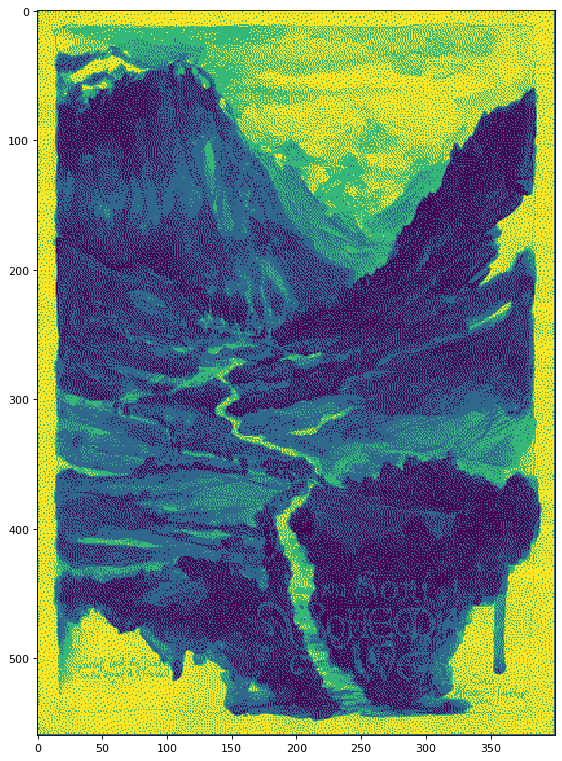

In [45]:

import numpy as np
from PIL import Image
from matplotlib import cm
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from requests import get
%matplotlib inline

def image_dither(path, black='#000000', white='#ffffff'):
    image_rgb = read_image(path)
    #image_gray = grayscale(image_rgb)
    #image_bw = floyd_steinberg(image_gray)
    image_col = floyd_steinberg(keepcols(image_rgb))
    #im = Image.fromarray(np.uint8(cm.gist_earth(image_bw)*255))
    #im.show() # shows in image viewer
    figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    #after = zhangSuen(image_bw)
    #imshow(image_bw) # show inline
    imshow(image_col) # show inline
    #imshow(after) # show inline
    #show(layout([[
    #    plot(image_gray, palette=gray(256)),
    #    plot(image_bw, palette=[black, white])        
    #]]))
    
def floyd_steinberg(image):
    image = image.copy()
    distribution = np.array([7, 3, 5, 1], dtype=float) / 16
    u = np.array([0, 1, 1, 1])
    v = np.array([1, -1, 0, 1])
    for y in range(image.shape[0] - 1):
        for x in range(image.shape[1] - 1):
            value = np.round(image[y, x])
            error = image[y, x] - value
            image[y, x] = value
            image[y + u, x + v] += error * distribution      
    image[:, -1] = 1
    image[-1, :] = 1
    return image

def grayscale(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] * .21 + \
            image[:, :, 1] * .72 + \
            image[:, :, 2] * .07
    return image.reshape(height, width)

def keepcols(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] + \
            image[:, :, 1] + \
            image[:, :, 2]
    return image.reshape(height, width)

def read_image(path, size=400):
    if path.startswith('https://'):
        image = Image.open(get(path, stream=True).raw)
    else:
        image = Image.open(path)
    
    width, height = image.size
    width, height = size, int(size * height / width)
    image = image.resize((width, height), Image.ANTIALIAS)  
    data = image.getdata()
    assert data.bands in [3, 4], 'RGB or RGBA image is required'
    raw = np.array(data, dtype=np.uint8)
    return raw.reshape(height, width, data.bands)

def plot(image, palette):
    y, x = image.shape
    plot = figure(x_range=(0, x), y_range=(0, y), 
                  plot_width=x, plot_height=y)
    plot.axis.visible = False
    plot.toolbar_location = None
    plot.min_border = 0
    plot.image([np.flipud(image)], x=0, y=0, dw=x, dh=y,
               palette=palette)
    return plot

if __name__=='__main__':
    image_dither('lotr-2012-rivendell-valley-landscape.jpg')

In [1]:
lst = [1703, 730, 300]
[(x / sum(lst)) for x in lst]

[0.6231247713135748, 0.26710574460300035, 0.10976948408342481]

In [1]:
import math

def contsq(a, n):
    res = a
    for i in range(n):
        res = a * math.sqrt(res)
    return res

if __name__=='__main__':
    print(contsq(10, 100))

100.0


In [1]:
# A stack is a container of elements with last in, first out access policy. Sometimes it also called LIFO.

class Stack:
    def __init__(self):
        self._first = None
        
    def __nonzero__(self):
        return self._first is not None 
    
    def append(self, value): # push
        self._first = (value, self._first) # stack is implemented as a nested list
        
    def pop(self):
        if self._first is None:
            raise IndexError("pop from empty stack")
        value, self._first = self._first
        return value
    
    def empty(self):
        if self._first is None:
            return True
        return False
        
if __name__=='__main__':
    mystack = Stack()
    mystack.append(5)
    mystack.append(8)
    mystack.append(2)
    print(mystack._first)
    print(mystack.empty())
    print(mystack.pop())
    print(mystack.pop())

(2, (8, (5, None)))
False
2
8


In [9]:
# Gray code
import math

def refl(l):
    '''reflect list and append'''
    return l + [x for x in l[::-1]]

def gray_enc(n):
    '''encode n in Gray code'''
    clst = ['0', '1']
    ndig = int(math.log2(n)) + 1 # number of digits needed
    k = 1
    np = 2 # to speed up: powers of 2 = length of encoding
    while k < ndig:
        prefl = [0] * np + [1] * np # set new prefixes
        digl = refl(clst) # reflect last digit list
        clst = []
        for i in range(len(digl)):
            clst.append(str(prefl[i]) + str(digl[i])) # concatenate prefixes and digits
        k += 1
        np *= 2
    return clst, ndig, clst[n]

def gray_dec(n):
    '''decode n from Gray code'''
    gclst = gray_enc(2**len(n)-1)[0]
    print(gclst)
    return gclst.index(n)

if __name__=='__main__':
    #print(refl([1,2,3]))
    print(gray_enc(10))
    print(gray_dec('1111'))
    print(gray_enc(17))
    print(gray_dec('11001'))

(['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000'], 4, '1111')
['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000']
10
(['00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100', '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001', '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111', '10110', '10010', '10011', '10001', '10000'], 5, '11001')
['00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100', '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001', '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111', '10110', '10010', '10011', '10001', '10000']
17


In [10]:
#!usr/bin/python3

# pip install selenium

from bs4 import BeautifulSoup
import time
from csv import DictWriter
import pprint
import datetime
from datetime import date, timedelta
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

def init_driver(driver_type):
    if driver_type == 1:
        driver = webdriver.Firefox()
    elif driver_type == 2:
        #driver = webdriver.Chrome()
        driver = webdriver.Chrome(executable_path=r"D:\BernieData\DeepL\webdriver\chromedriver.exe")
        #driver = webdriver.Chrome("D:\BernieData\DeepL\webdriver")
    elif driver_type == 3:
        driver = webdriver.Ie()
    elif driver_type == 4:
        driver = webdriver.Opera()
    elif driver_type == 5:
        driver = webdriver.PhantomJS()
    driver.wait = WebDriverWait(driver, 5)
    return driver


def scroll(driver, start_date, end_date, words, lang, max_time=180):
    languages = { 1: 'en', 2: 'it', 3: 'es', 4: 'fr', 5: 'de', 6: 'ru', 7: 'zh'}
    url = "https://twitter.com/search?q="
    for w in words[:-1]:
        url += "{}%20OR".format(w)
    url += "{}%20".format(words[-1])
    url += "since%3A{}%20until%3A{}&".format(start_date, end_date)
    if lang != 0:
        url += "l={}&".format(languages[lang])
    url += "src=typd"
    print(url)
    driver.get(url)
    start_time = time.time()  # remember when we started
    while (time.time() - start_time) < max_time:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print( str(time.time() - start_time) + " < " + str(max_time) )

def scrape_tweets(driver):
    try:
        tweet_divs = driver.page_source
        obj = BeautifulSoup(tweet_divs, "html.parser")
        content = obj.find_all("div", class_="content")
        print(content)

        print("content printed")
        print(len(content))
        for c in content:
            tweets = c.find("p", class_="tweet-text").strings
            tweet_text = "".join(tweets)
            print(tweet_text)
            print("-----------")
            try:
                name = (c.find_all("strong", class_="fullname")[0].string).strip()
            except AttributeError:
                name = "Anonymous"
            date = (c.find_all("span", class_="_timestamp")[0].string).strip()

            datestring = str(c.find_all("span", class_="_timestamp")[0])
            print(datestring)
            datestring = datestring[datestring.index("data-time")+11:]
            datestring = datestring[:datestring.index("\"")]
            print(datestring)
            # print(tweet_text)            
            try:
                write_csv(datestring,tweet_text,name)
            except:
                print('csv error')

    except Exception as e:
        print("Something went wrong!")
        print(e)
        driver.quit()

def write_csv_header():
    with open("twitterData.csv", "w+") as csv_file:
        fieldnames = ['Date', 'Name', 'Tweets','Tags']
        writer = DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()

def write_csv(date,tweet,name):
    with open("twitterData.csv", "a+") as csv_file:
        fieldnames = ['Date', 'Name', 'Tweets','Tags']
        writer = DictWriter(csv_file, fieldnames=fieldnames)
        #writer.writeheader()
        writer.writerow({'Date': date,'Name': name,'Tweets': tweet})

def make_csv(data):
    l = len(data['date'])
    print("count: %d" % l)
    with open("twitterData.csv", "a+") as file:
        fieldnames = ['Date', 'Name', 'Tweets']
        writer = DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(l):
            writer.writerow({'Date': data['date'][i],
                            'Name': data['name'][i],
                            'Tweets': data['tweet'][i],
                            })

def get_all_dates(start_date, end_date):
    dates = []
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    step = timedelta(days=1)
    while start_date <= end_date:
        dates.append(str(start_date.date()))
        start_date += step
    return dates

def main():
    driver_type = int(input("1) Firefox | 2) Chrome | 3) IE | 4) Opera | 5) PhantomJS\nEnter the driver you want to use: "))
    wordsToSearch = input("Enter the words: ").split(',')
    for w in wordsToSearch:
        w = w.strip()
    start_date = input("Enter the start date in (YYYY-MM-DD): ")
    end_date = input("Enter the end date in (YYYY-MM-DD): ")

    lang = int(input("0) All Languages 1) English | 2) Italian | 3) Spanish | 4) French | 5) German | 6) Russian | 7) Chinese\nEnter the language you want to use: "))
    all_dates = get_all_dates(start_date, end_date)
    print(all_dates)
    write_csv_header()
    for i in range(len(all_dates) - 1):
        driver = init_driver(driver_type)
        scroll(driver, str(all_dates[i]), str(all_dates[i + 1]), wordsToSearch, lang)
        scrape_tweets(driver)
        time.sleep(5)
        print("The tweets for {} are ready!".format(all_dates[i]))
        driver.quit()

if __name__ == "__main__":
    main()

1) Firefox | 2) Chrome | 3) IE | 4) Opera | 5) PhantomJS
Enter the driver you want to use: 2
Enter the words: trump
Enter the start date in (YYYY-MM-DD): 2019-11-01
Enter the end date in (YYYY-MM-DD): 2019-11-20
0) All Languages 1) English | 2) Italian | 3) Spanish | 4) French | 5) German | 6) Russian | 7) Chinese
Enter the language you want to use: 1
['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20']
https://twitter.com/search?q=trump%20since%3A2019-11-01%20until%3A2019-11-02&l=en&src=typd
0.3251309394836426 < 180
0.5335755348205566 < 180
0.5744633674621582 < 180
0.5784544944763184 < 180
0.6243314743041992 < 180
0.6323106288909912 < 180
0.6537630558013916 < 180
0.7046282291412354 < 180
0.753495454788208 < 180
0.7884001731872559 < 180
0.7913920879364014 < 180


2.5208828449249268 < 180
2.523876190185547 < 180
2.526866912841797 < 180
2.5308566093444824 < 180
2.5348458290100098 < 180
2.538834571838379 < 180
2.540830135345459 < 180
2.5438218116760254 < 180
2.54681396484375 < 180
2.5488085746765137 < 180
2.5537965297698975 < 180
2.581435203552246 < 180
2.5904104709625244 < 180
2.5963945388793945 < 180
2.599386692047119 < 180
2.613348960876465 < 180
2.620364189147949 < 180
2.626314401626587 < 180
2.6313259601593018 < 180
2.6342933177948 < 180
2.6382827758789062 < 180
2.6412744522094727 < 180
2.6432697772979736 < 180
2.6462621688842773 < 180
2.648256301879883 < 180
2.652247190475464 < 180
2.6552376747131348 < 180
2.658229351043701 < 180
2.6602234840393066 < 180
2.663296699523926 < 180
2.6652798652648926 < 180
2.6692733764648438 < 180
2.6722609996795654 < 180
2.6742560863494873 < 180
2.677248239517212 < 180
2.6802401542663574 < 180
2.6822338104248047 < 180
2.6852285861968994 < 180
2.6882193088531494 < 180
2.6912107467651367 < 180
2.6942026615142822 

5.03967022895813 < 180
5.0665953159332275 < 180
5.120562314987183 < 180
5.16978120803833 < 180
5.208676099777222 < 180
5.214660882949829 < 180
5.2176525592803955 < 180
5.270005226135254 < 180
5.294897794723511 < 180
5.298907279968262 < 180
5.302900314331055 < 180
5.306721210479736 < 180
5.309710502624512 < 180
5.311730623245239 < 180
5.31470513343811 < 180
5.317689418792725 < 180
5.321692228317261 < 180
5.324694633483887 < 180
5.326689720153809 < 180
5.329657554626465 < 180
5.33165168762207 < 180
5.334643840789795 < 180
5.3376359939575195 < 180
5.340627431869507 < 180
5.343644857406616 < 180
5.345613718032837 < 180
5.348635911941528 < 180
5.350601673126221 < 180
5.353592395782471 < 180
5.3565850257873535 < 180
5.358579874038696 < 180
5.361572027206421 < 180
5.364588260650635 < 180
5.366586923599243 < 180
5.369550466537476 < 180
5.372541904449463 < 180
5.375560283660889 < 180
5.377556324005127 < 180
5.3805506229400635 < 180
5.38254714012146 < 180
5.386529922485352 < 180
5.38849997520446

9.160030603408813 < 180
9.215882539749146 < 180
9.222861528396606 < 180
9.226850748062134 < 180
9.229843854904175 < 180
9.232836246490479 < 180
9.23881983757019 < 180
9.242809534072876 < 180
9.245800971984863 < 180
9.247795343399048 < 180
9.25077223777771 < 180
9.256754159927368 < 180
9.259746313095093 < 180
9.262738704681396 < 180
9.264733076095581 < 180
9.267725229263306 < 180
9.28867220878601 < 180
9.29265809059143 < 180
9.295650243759155 < 180
9.29864239692688 < 180
9.305624961853027 < 180
9.52043080329895 < 180
9.558834791183472 < 180
9.563822031021118 < 180
9.567811727523804 < 180
9.571800470352173 < 180
9.573795318603516 < 180
9.576786518096924 < 180
9.579779148101807 < 180
9.58277153968811 < 180
9.594770669937134 < 180
9.599725723266602 < 180
9.603715181350708 < 180
9.605952978134155 < 180
9.608947992324829 < 180
9.610942363739014 < 180
9.613933801651001 < 180
9.654867172241211 < 180
9.662845373153687 < 180
9.665837287902832 < 180
9.689774513244629 < 180
9.723683834075928 < 180

13.614399433135986 < 180
13.75901174545288 < 180
13.854758739471436 < 180
13.858834028244019 < 180
13.862661361694336 < 180
13.865648031234741 < 180
13.923494100570679 < 180
13.927531719207764 < 180
13.92952823638916 < 180
13.932520627975464 < 180
13.936509132385254 < 180
13.938986539840698 < 180
13.9419527053833 < 180
13.944969654083252 < 180
13.946939468383789 < 180
13.967464685440063 < 180
13.980828762054443 < 180
14.012747287750244 < 180
14.056302309036255 < 180
14.060291528701782 < 180
14.064282178878784 < 180
14.071262836456299 < 180
14.081236362457275 < 180
14.106170177459717 < 180
14.111155271530151 < 180
14.11415982246399 < 180
14.117156028747559 < 180
14.121144771575928 < 180
14.123140335083008 < 180
14.126132726669312 < 180
14.129123449325562 < 180
14.131070137023926 < 180
14.134036302566528 < 180
14.137028217315674 < 180
14.139023065567017 < 180
14.142015218734741 < 180
14.145031690597534 < 180
14.147001028060913 < 180
14.15002179145813 < 180
14.1529860496521 < 180
14.15600

19.245630502700806 < 180
19.24862241744995 < 180
19.252611875534058 < 180
19.257296323776245 < 180
19.26028823852539 < 180
19.262781143188477 < 180
19.264806985855103 < 180
19.268803358078003 < 180
19.27175784111023 < 180
19.274749040603638 < 180
19.27776789665222 < 180
19.279735803604126 < 180
19.282727003097534 < 180
19.285720586776733 < 180
19.288711547851562 < 180
19.291730165481567 < 180
19.293724536895752 < 180
19.296690464019775 < 180
19.298685312271118 < 180
19.30267572402954 < 180
19.305691242218018 < 180
19.308683395385742 < 180
19.310677766799927 < 180
19.313645124435425 < 180
19.316638469696045 < 180
19.32062602043152 < 180
19.32364583015442 < 180
19.32663655281067 < 180
19.328630447387695 < 180
19.331621885299683 < 180
19.334590196609497 < 180
19.337605953216553 < 180
19.339601039886475 < 180
19.342567682266235 < 180
19.344563245773315 < 180
19.347553968429565 < 180
19.35054659843445 < 180
19.354416131973267 < 180
19.35641074180603 < 180
19.359402418136597 < 180
19.3623945

24.353395223617554 < 180
24.358381986618042 < 180
24.363401174545288 < 180
24.366360187530518 < 180
24.37224316596985 < 180
24.375237464904785 < 180
24.378756999969482 < 180
24.380802154541016 < 180
24.383827686309814 < 180
24.387813806533813 < 180
24.389806509017944 < 180
24.39277219772339 < 180
24.395792245864868 < 180
24.397759437561035 < 180
24.401749849319458 < 180
24.404765605926514 < 180
24.40673565864563 < 180
24.409727334976196 < 180
24.41172218322754 < 180
24.414714097976685 < 180
24.41770625114441 < 180
24.420698404312134 < 180
24.42371654510498 < 180
24.425710201263428 < 180
24.428677082061768 < 180
24.78472590446472 < 180
24.95526933670044 < 180
24.96025538444519 < 180
24.963247060775757 < 180
24.96723699569702 < 180
24.970320463180542 < 180
24.97331166267395 < 180
24.976304054260254 < 180
24.980295181274414 < 180
25.03315234184265 < 180
25.129926681518555 < 180
25.18675136566162 < 180
25.564777374267578 < 180
25.790174961090088 < 180
26.07443594932556 < 180
26.40256023406

35.92493557929993 < 180
35.92792820930481 < 180
35.9309196472168 < 180
35.93391227722168 < 180
35.93790078163147 < 180
35.94154763221741 < 180
35.94453978538513 < 180
35.946534872055054 < 180
35.94952630996704 < 180
35.95351529121399 < 180
35.956042766571045 < 180
35.95903491973877 < 180
35.9610321521759 < 180
35.963996171951294 < 180
35.96701741218567 < 180
35.969980239868164 < 180
36.37090730667114 < 180
36.64018774032593 < 180
36.72695565223694 < 180
36.89171838760376 < 180
37.473588943481445 < 180
37.82945656776428 < 180
37.9643452167511 < 180
38.13360786437988 < 180
38.46622610092163 < 180
38.68163561820984 < 180
39.04523181915283 < 180
39.05121612548828 < 180
39.05520439147949 < 180
39.0581955909729 < 180
39.062185287475586 < 180
39.06517839431763 < 180
39.069167137145996 < 180
39.07315802574158 < 180
39.07714629173279 < 180
39.08013653755188 < 180
39.085124254226685 < 180
39.08797478675842 < 180
39.097930908203125 < 180
39.179710149765015 < 180
39.466941356658936 < 180
40.210860

71.30177545547485 < 180
71.30377006530762 < 180
71.30676245689392 < 180
71.31075072288513 < 180
71.3137435913086 < 180
71.9377064704895 < 180
72.36057543754578 < 180
72.62885880470276 < 180
73.23793411254883 < 180
73.76051807403564 < 180
74.65215706825256 < 180
75.47130870819092 < 180
75.63187861442566 < 180
75.87831592559814 < 180
76.067458152771 < 180
76.99807739257812 < 180
77.364093542099 < 180
78.27735543251038 < 180
78.53986692428589 < 180
79.43031811714172 < 180
79.93736624717712 < 180
80.70292377471924 < 180
81.3352837562561 < 180
81.77345776557922 < 180
82.25571942329407 < 180
82.99194931983948 < 180
83.41550064086914 < 180
84.17098665237427 < 180
84.90225291252136 < 180
85.14790606498718 < 180
85.87755179405212 < 180
86.31039357185364 < 180
87.17051982879639 < 180
87.8687059879303 < 180
88.14044141769409 < 180
89.01868271827698 < 180
89.67185401916504 < 180
90.56436324119568 < 180
91.20981168746948 < 180
91.75992512702942 < 180
92.72729468345642 < 180
93.25128722190857 < 180


95.0800666809082 < 180
95.08305859565735 < 180
95.0860505104065 < 180
95.09004068374634 < 180
95.09303283691406 < 180
95.09604954719543 < 180
95.10001349449158 < 180
95.10303020477295 < 180
95.10502576828003 < 180
95.10799193382263 < 180
95.10998678207397 < 180
95.11297917366028 < 180
95.11599612236023 < 180
95.1189877986908 < 180
95.12197947502136 < 180
95.12397480010986 < 180
95.12694144248962 < 180
95.1289644241333 < 180
95.13169002532959 < 180
95.1347029209137 < 180
95.13769245147705 < 180
95.13968992233276 < 180
95.14265370368958 < 180
95.14467406272888 < 180
95.1476411819458 < 180
95.15063309669495 < 180
95.15365481376648 < 180
95.15564465522766 < 180
95.15861201286316 < 180
95.16063141822815 < 180
95.16359949111938 < 180
95.16661834716797 < 180
95.16861033439636 < 180
95.17160153388977 < 180
95.17359638214111 < 180
95.17656397819519 < 180
95.17855858802795 < 180
95.1815505027771 < 180
95.18454265594482 < 180
95.18755912780762 < 180
95.18955373764038 < 180
95.1925458908081 < 180


96.2392029762268 < 180
96.24219465255737 < 180
96.24518752098083 < 180
96.2491843700409 < 180
96.25219488143921 < 180
96.25516080856323 < 180
96.25817775726318 < 180
96.26017212867737 < 180
96.26316547393799 < 180
96.26613140106201 < 180
96.26914834976196 < 180
96.2711431980133 < 180
96.27413511276245 < 180
96.27612972259521 < 180
96.27909660339355 < 180
96.28209018707275 < 180
96.28510618209839 < 180
96.28710103034973 < 180
96.29006743431091 < 180
96.29308414459229 < 180
96.29507899284363 < 180
96.29807376861572 < 180
96.30103826522827 < 180
96.30405521392822 < 180
96.30604982376099 < 180
96.30904173851013 < 180
96.3110363483429 < 180
96.3140037059784 < 180
96.31702041625977 < 180
96.3199872970581 < 180
96.3220067024231 < 180
96.3249740600586 < 180
96.32696866989136 < 180
96.3299605846405 < 180
96.33295321464539 < 180
96.33596968650818 < 180
96.33796405792236 < 180
96.34093141555786 < 180
96.34295773506165 < 180
96.34591817855835 < 180
96.34893488883972 < 180
96.35092973709106 < 180
9

101.08358812332153 < 180
101.08658289909363 < 180
101.08960127830505 < 180
101.09356904029846 < 180
101.09758114814758 < 180
101.10054326057434 < 180
101.10356450080872 < 180
101.10555744171143 < 180
101.10854911804199 < 180
101.11054134368896 < 180
101.1135094165802 < 180
101.1155276298523 < 180
101.1184949874878 < 180
101.12048959732056 < 180
101.12348175048828 < 180
101.12547659873962 < 180
101.12846851348877 < 180
101.13046288490295 < 180
101.13345503807068 < 180
101.13547420501709 < 180
101.13844156265259 < 180
101.14046430587769 < 180
101.14345264434814 < 180
101.14545059204102 < 180
101.14844274520874 < 180
101.15043449401855 < 180
101.15340185165405 < 180
101.15539646148682 < 180
101.15838837623596 < 180
101.16040825843811 < 180
101.16337537765503 < 180
101.16639256477356 < 180
101.16839027404785 < 180
101.17137908935547 < 180
101.17334842681885 < 180
101.18033027648926 < 180
101.18428039550781 < 180
101.18627429008484 < 180
101.1888644695282 < 180
101.19185590744019 < 180
101.

106.19425225257874 < 180
106.19724440574646 < 180
106.20024704933167 < 180
106.20422792434692 < 180
106.20721817016602 < 180
106.2102427482605 < 180
106.21223568916321 < 180
106.2172167301178 < 180
106.22020936012268 < 180
106.22220301628113 < 180
106.22517013549805 < 180
106.22716450691223 < 180
106.23015761375427 < 180
106.23417162895203 < 180
106.23616695404053 < 180
106.23915767669678 < 180
106.2411298751831 < 180
106.24411940574646 < 180
106.24713730812073 < 180
106.25012803077698 < 180
106.2521231174469 < 180
106.25511574745178 < 180
106.25710964202881 < 180
106.26010131835938 < 180
106.26209616661072 < 180
106.2650637626648 < 180
106.26805520057678 < 180
106.27107644081116 < 180
106.27304220199585 < 180
106.27603387832642 < 180
106.27802872657776 < 180
106.28102087974548 < 180
106.28404498100281 < 180
106.28700470924377 < 180
106.28902506828308 < 180
106.29199123382568 < 180
106.29398608207703 < 180
106.29697799682617 < 180
106.2999701499939 < 180
106.30298829078674 < 180
106.30

107.31932878494263 < 180
107.32234764099121 < 180
107.32433986663818 < 180
107.32730722427368 < 180
107.3302993774414 < 180
107.33329105377197 < 180
107.3362832069397 < 180
107.339275598526 < 180
107.34229898452759 < 180
107.34526133537292 < 180
107.34924864768982 < 180
107.35226917266846 < 180
107.35523295402527 < 180
107.35824990272522 < 180
107.36024785041809 < 180
107.36321258544922 < 180
107.36720037460327 < 180
107.3701274394989 < 180
107.37312245368958 < 180
107.37611413002014 < 180
107.37839102745056 < 180
107.38135862350464 < 180
107.38435101509094 < 180
107.38734245300293 < 180
107.39036679267883 < 180
107.39235401153564 < 180
107.39534616470337 < 180
107.39831566810608 < 180
107.40130519866943 < 180
107.40429711341858 < 180
107.40629196166992 < 180
107.40928411483765 < 180
107.41230368614197 < 180
107.41526889801025 < 180
107.41826009750366 < 180
107.42127656936646 < 180
107.42327356338501 < 180
107.42627763748169 < 180
107.42825961112976 < 180
107.43224787712097 < 180
107.4

123.03615689277649 < 180
123.03914880752563 < 180
123.04114389419556 < 180
123.0451328754425 < 180
123.04912209510803 < 180
123.05211400985718 < 180
123.05510592460632 < 180
123.05710196495056 < 180
123.05909538269043 < 180
123.06208753585815 < 180
123.06607699394226 < 180
123.66770768165588 < 180
124.14158582687378 < 180
124.93440437316895 < 180
125.68933963775635 < 180
127.05278277397156 < 180
127.9165370464325 < 180
129.28023552894592 < 180
129.8391833305359 < 180
131.04628014564514 < 180
131.84330916404724 < 180
132.94528198242188 < 180
133.20957469940186 < 180
133.56343293190002 < 180
133.80937123298645 < 180
134.76524424552917 < 180
135.16125988960266 < 180
135.9793562889099 < 180
136.83207607269287 < 180
138.35506129264832 < 180
139.37134408950806 < 180
140.59029841423035 < 180
141.36759185791016 < 180
142.49651646614075 < 180
143.55222392082214 < 180
144.50220561027527 < 180
145.2064664363861 < 180
146.1085503101349 < 180
147.0247700214386 < 180
147.46699333190918 < 180
148.797

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Well, case solved. No body cares abt Biden or his son.
That's not the objective. The 4 people gave their opinions &
you know what opinions are like. Like he asked RU to find HRC's 33K emails? You obviously haven't followed DT over his career. Sarcasm is a subtle art form.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652788" data-time-ms="1572652788000">Nov 1</span>
1572652788
Get #Trump out!! This isn’t normal, American, or decent. @realDonaldTrump is a POS. https://twitter.com/TheRynheart/status/1190394966801100800 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652761" data-time-ms="1572652761000">Nov 1</span>
1572652761
It's an insanity defense by another name.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652733" data-time-ms="1572652733000">Nov 1</span>
15726

-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652721" data-time-ms="1572652721000">Nov 1</span>
1572652721
You can’t go back. That city would spit you right out.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652721" data-time-ms="1572652721000">Nov 1</span>
1572652721
to put bills to Senate floor for votes. And a president that is simply vindictive
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652716" data-time-ms="1572652716000">Nov 1</span>
1572652716
Sure, because that’s what every staunch Republican Constitutionalist conservative is seeking...someone who will take their guns, open their borders, raise their taxes, suppress their speech and trounce on their religious and overall liberties as an American. @realDonaldTrump
-----------
<span class="_timestamp js-sh

Oh @AdamSchiff Schiffy Schiff Schifferton, what a web of lies you weave! The Truth is Schiffy, the only thing you do well is attempting to deceive! Americans want you to resign better yet just leave! @realDonaldTrump will win in 2020 that you best believe! #MakeCongressWorkAgainpic.twitter.com/mrMSxRh4eM
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652436" data-time-ms="1572652436000">Nov 1</span>
1572652436
They are going to say it was an exercise of his foreign policy authority. No question about it.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652434" data-time-ms="1572652434000">Nov 1</span>
1572652434
Your time is coming to an end.pic.twitter.com/eWeR3jwxOm
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652434" data-time-ms="1572652434000">Nov 1</span>
157265

We Dont Think So Either Mr President! The Good News Is,That “Fake Mexican” Said If He Lost, He Would Never Try Again In Politics. That Right There Shows Us He Is A Quitter & Not Presidential MaterialGood Luck To Beto PS He Now Would Like To Be Called Robert Francis O'Rourke
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652196" data-time-ms="1572652196000">Nov 1</span>
1572652196
On whose side?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652190" data-time-ms="1572652190000">Nov 1</span>
1572652190
To me the proper logic is this: If Trump demanded a county DA indict a political opponent in exchange for federal aid, no one (well, no one worth mentioning) would question for a moment that such a thing was illegal and impeachable. 

That it's a foreign country changes nothing.
-----------
<span class="_timestamp js-short-timestamp" data-aria-

When do the perp walks begin? #DrainTheSwamppic.twitter.com/zmCbSHCkcp
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652075" data-time-ms="1572652075000">Nov 1</span>
1572652075
It's me. Mystery solved.

Now shut up.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652075" data-time-ms="1572652075000">Nov 1</span>
1572652075
Yep, it's ridiculous that he lets his officers block the crosswalk like this in non-emergencies.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572652074" data-time-ms="1572652074000">Nov 1</span>
1572652074
YOU LIE!!  You ARE the Swamp!!   Between you and Azar and the mfking Demonrats, you’re DETERMINED for Trump not to have a second term!!  Get off Big Tobacco’s NUTS long enough to tell the truth!! @realDonaldTrump @parscalehttps://twitter.com/Tobac

Believe it or not I once lost a case more or less on that theory.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651965" data-time-ms="1572651965000">Nov 1</span>
1572651965
No, that’s Donald Trump when he wakes up each morning. FTFY.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651965" data-time-ms="1572651965000">Nov 1</span>
1572651965
I don't find it very funny at all 
What would happen if a Republican was to do that?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651952" data-time-ms="1572651952000">Nov 1</span>
1572651952
At first I thought "why does 1976 Geddy Lee care so much?"

Great job, great work.
Just donated.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651952" data-time-ms="15

But they can impeach you, because you are a criminal. Abuse of power, obstruction of justice, emoluments, the list of your crimes is endless. You're going to die in prison.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651745" data-time-ms="1572651745000">Nov 1</span>
1572651745
Waiting for YOU IN TUPELO MISSISSIPPI 
SO EXCITED 
CANT WAIT TO SEE
@realDonaldTrump
On stage LIVE
DOWN WITH THE WITCH HUNT
SCORCH THEM MR. PRESIDENT pic.twitter.com/okQoz6NyVO
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651742" data-time-ms="1572651742000">Nov 1</span>
1572651742
There’s a 101 year old woman called Dot in @theage today offering to do a contract killing of @realDonaldTrump so that’s unexpected pic.twitter.com/trrO7q2msa
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651732

<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651607" data-time-ms="1572651607000">Nov 1</span>
1572651607
This is extremely dangerous Barr/Trump requesting info from our allies to take down our agencies. British official "it is like nothing we have come across before, they are basically asking, in quite robust terms, for help in doing a hatchet job on their own intelligence agencies" https://twitter.com/Independent/status/1190342733078118401 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651607" data-time-ms="1572651607000">Nov 1</span>
1572651607
“It’s energized my base like I’ve never seen before.”

President Trump said that #Democrat's efforts to #Impeach him will backfire, and are already having profound effects on his core supporters. Some figures back up Trump’s claim. https://www.theepochtimes.com/trump-says-impeachment-efforts-have-energize

Beto brought valued perspective to the national debate, and I particularly appreciated his denunciation of Trump’s mistreatment of refugees and propensity towards racism and bigotry. Thank you @BetoORourke for your dedication to putting America back on track.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651493" data-time-ms="1572651493000">Nov 1</span>
1572651493
Greg, they're already headed there, like trained sheep waiting for the dog.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651489" data-time-ms="1572651489000">Nov 1</span>
1572651489
I agree....he really does and has done so much for this country. But liberals prefer sound bites to the truth. Not sure why. One would think they'd prefer to be joyful. But they prefer to be miserable/dishonest. At some point, they won't be able to deny what is before them.
-----------
<span class="

“Growing number of GOP senators consider acknowledging the truth that Trump already admitted.” If anyone hasn’t noticed- http://this.is .insane.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651362" data-time-ms="1572651362000">Nov 1</span>
1572651362
Rally caps on!! 

Trump Rally!! pic.twitter.com/VWnWHotJaL
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651354" data-time-ms="1572651354000">Nov 1</span>
1572651354
Democrats are doing everything they can to take out Trump now because they know that if it comes down to an election in 2020 they will lose.

Democrats are affraid of Trump.

Who agrees with me?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651336" data-time-ms="1572651336000">Nov 1</span>
1572651336
Your an idiot of a @POTUS @realDonaldTrump the whistleb

1572651229
This is historically profound. Can I actually buy these somewhere for my great grand kids somewhere?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651228" data-time-ms="1572651228000">Nov 1</span>
1572651228
Pretty sure defending the constitution is their job, and, unfortunately, it is an active job at this point in time. The times found us, and 45 needs to be held accountable for betraying us all.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651225" data-time-ms="1572651225000">Nov 1</span>
1572651225
*persecuting political opponents
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651218" data-time-ms="1572651218000">Nov 1</span>
1572651218
HUNDREDS LINE UP HOURS EARLY in Sub-Freezing Temps to See President Trump in Tupelo -- THOUSANDS FILL ARENA! (VIDEO

This makes ZERO sense. They are going to DEFEND extorting Ukraine for Trump's personal benefit?! https://www.washingtonpost.com/politics/growing-number-of-gop-senators-consider-acknowledgingtrumps-quid-pro-quo-on-ukraine/2019/11/01/72084a3e-fcc4-11e9-9534-e0dbcc9f5683_story.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651083" data-time-ms="1572651083000">Nov 1</span>
1572651083
#impeachment numbers going up.

Repubs will see in order to win they will need to #DumpTrump2020pic.twitter.com/JGTAGZOoYF
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572651075" data-time-ms="1572651075000">Nov 1</span>
1572651075
He is toast. Cant wait to get revenge by actively campaigning against him in 2020. I supported him until this. Not again. I will have a lot of free time to set up robo calls etc to my 9500 customers, will try to get lists from othe

That's a great question. I'm Republican and l see everything this President does. He is truly the worst thing to happen to our great country in a very long time.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650969" data-time-ms="1572650969000">Nov 1</span>
1572650969
I requested a meeting with @NYGovCuomo  to discuss his attempt to ban flavored product as an adult voter that lives in NY, and this is the garbage answer I recieve!!!! Coward cant even do his own dirty work! 
@Amelia_RH
@KatTimpf
@gopaulblair
@parscale
@realDonaldTrump pic.twitter.com/eBI6caltCR
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650957" data-time-ms="1572650957000">Nov 1</span>
1572650957
Lord knows he's the right color for it. 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650953" data-ti

Please consider running for governor of Indiana in 2020.  We need that seat too. You just don’t have the experience to lead us out of the domestic and foreign mess Trump has created. Get experience first.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650715" data-time-ms="1572650715000">Nov 1</span>
1572650715
I'm awaiting the day that Donald gets put under oath. The prattling pissant parasite can't go 60 seconds without lying.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650713" data-time-ms="1572650713000">Nov 1</span>
1572650713
Any serious person who understands whistle blower laws recognizes how foolish and dishonest this tweet is.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650705" data-time-ms="1572650705000">Nov 1</span>
1572650705
I can't wait to welcom

The Whistleblower's account was not the slightest bit fraudulent. Eight witnesses have confirmed the details of the the Whistleblower's account.  Trump is tweeting this gibberish merely to confuse the dimwits who believe him.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650511" data-time-ms="1572650511000">Nov 1</span>
1572650511
#trump death touch is killing everything on the right, potentially including Fox News. Me: #trump should have his hands all over #MoscowMitch too.

Ratify the #ERA & #VAWA now. #VoteBlue 
Sean Hannity Threatens To Leave As Fox News Is Sinking Fasthttps://www.politicususa.com/2019/04/25/sean-hannity-threatens-to-leave-as-fox-news-is-sinking-fast.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650508" data-time-ms="1572650508000">Nov 1</span>
1572650508
Vegas has a message for @realdonaldtrump courtesy @earth

<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650417" data-time-ms="1572650417000">Nov 1</span>
1572650417
Oh,  stop, @realDonaldTrump. Only in your deranged, disturbed mind is there any daylight between what the whistleblower said and the call memo and the witness statements released thus far. https://twitter.com/realDonaldTrump/status/1190407200109318144 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650415" data-time-ms="1572650415000">Nov 1</span>
1572650415
UnTrumpedpic.twitter.com/Z51FZBqDuS
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650412" data-time-ms="1572650412000">Nov 1</span>
1572650412
Here is the new leader of ISIS-DAISH 

Stop this barbaric killer !!!
#WorldResistanceDaypic.twitter.com/BdUa6LwyL1
-----------
<span class="_timestamp js-short-timestamp" data-

But the content of the whistleblower’s report was accurate, including the sections about the phone call. What are you even talking about?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650306" data-time-ms="1572650306000">Nov 1</span>
1572650306
I do. I pray daily that he enjoys prison.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650304" data-time-ms="1572650304000">Nov 1</span>
1572650304
May I suggest, Mr President, that calling "inaccurate" statements "fraudulent" is not the way to go for you.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650303" data-time-ms="1572650303000">Nov 1</span>
1572650303
Donald Trump will never be respected. Not by world leaders, nor scientists, nor anyone else.

And he is only “feared” the way you would fear a meth-addicted circus c

This is excellent, particularly after the breaking news on Wed night about Eisenberg's role in hiding Trump's transcripts with foreign leaders.

Plus, he's a lawyer. He knows he'll be disbarred if he defies this subpoena. https://twitter.com/npfandos/status/1190404190331379714 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650108" data-time-ms="1572650108000">Nov 1</span>
1572650108
It was just reported earlier that Eisenberg told Lt. Col. Vindman not to discuss his serious concerns about Trump and Zelensky's phone call with anyone. Now, impeachment investigators have subpoenaed Eiseneberg, according to NYT. https://twitter.com/npfandos/status/1190404190331379714 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572650101" data-time-ms="1572650101000">Nov 1</span>
1572650101
#Flavors for #American ADULTS have been legally available & #LESSHar

America loves winning!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649892" data-time-ms="1572649892000">Nov 1</span>
1572649892
That is true Mr President. Also we MUST impeach someone who HAS broken the rules laid out in our Constitution (hint.....it’s you). Enjoy Florida.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649888" data-time-ms="1572649888000">Nov 1</span>
1572649888
Every day I wonder how many good tweets I have left in me. I keep thinking I'll run out of ideas any day.

They still keep coming somehow. 
I just need to make it another year.

If President Trump can fight for us every day I can fight for him every day until the election.

#MAGA
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649886" data-time-ms="1572649886000">Nov 1</span>
1572649886
With

If no candidate is pro vaping I'm staying home.

Even worse, I'll spend the next 367 days convincing EVERYONE I know to stay home or vote against @realDonaldTrump!

Tell him @parscale if you don't quit first, since he's a boat anchor candidate that's sinking your career.https://twitter.com/whycherrywhy/status/1190392393297780736 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649796" data-time-ms="1572649796000">Nov 1</span>
1572649796
Trump Rally tonight Right???
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649784" data-time-ms="1572649784000">Nov 1</span>
1572649784
You’re finally going to face consequences for the first time in your life and it’s DELICIOUS
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649781" data-time-ms="1572649781000">Nov 1</span>
1572649781

I don’t give a damn about Twitter “messing” with my account. That they’re frightened enough to mess with me is validating.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649567" data-time-ms="1572649567000">Nov 1</span>
1572649567
Beto O'Rourke has made the right decision. 
And graciously dedicated himself to fighting to beat Trump and support the nominee, whoever she is.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649552" data-time-ms="1572649552000">Nov 1</span>
1572649552
“You made the economy so strong I no longer have an excuse for not having a job and Mom & Dad won’t give me anymore money!”
#ImpeachmentReasonspic.twitter.com/LJ51C34hwW
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649549" data-time-ms="1572649549000">Nov 1</span>
1572649549
Beto belongs in t

Why do liberals fantasize about scenarios that literally will never happen?

Does this yapping garden gnome REALLY think @realDonaldTrump would waste his time on her?

#BeBest & get back to class.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649440" data-time-ms="1572649440000">Nov 1</span>
1572649440
KGB leader @SpeakerPelosi wants to learn the hard way.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649425" data-time-ms="1572649425000">Nov 1</span>
1572649425
Packed house again! Americans LOVE @realDonaldTrump!!! 

President Donald Trump Rally LIVE in Tupelo, MS 11/1/19 https://rsbnetwork.com/2019/11/president-donald-trump-rally-live-in-tupelo-ms-11-1-19/ … via @RSBNetwork
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649420" data-time-ms="1572649420000">Nov 1</s

Greta Thunberg says meeting with Trump 'would be a waste of time' https://news.yahoo.com/greta-thunberg-trump-meeting-waste-of-time-ellen-show-145843540.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649309" data-time-ms="1572649309000">Nov 1</span>
1572649309
In fact, we must impeach and imprison the President of the United States.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649302" data-time-ms="1572649302000">Nov 1</span>
1572649302
Very much predicted he would, i just thought it be earlier. 

Anyway, beto was never on anyone's radar in the first place. He wasn't born for this or anything else like this.

@BetoORourke, i wish you much success on your senate run.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649300" data-time-ms="1572649300000">Nov 1</spa

Yes. He’s supposed to be Obama and the girl is Hillary.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649094" data-time-ms="1572649094000">Nov 1</span>
1572649094
Beto will lose every time with those two comments he made regarding tearing down the wall and gun confiscation. That will be played over and over again and thrown in the faces of voters via social media as well as tv ads. He won’t have a chance. 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649091" data-time-ms="1572649091000">Nov 1</span>
1572649091
You've done thousands of things wrong so guess you're getting impeached traitor 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572649090" data-time-ms="1572649090000">Nov 1</span>
1572649090
Yeah, but "Who is Q?"https://twitter.com/realDonaldTrump/status/928325

We know that.
But, you CAN impeach a president who has committed multiple high crimes and misdemeanors, including tax fraud, extorting a foreign government for election assistance, and obstruction of justice.

#ImpeachTrumpNow
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648985" data-time-ms="1572648985000">Nov 1</span>
1572648985
Let's all sell our blocked leftists  lists to data mining companies, and use the money to buy MAGA hats and donate to President Trump's re-election campaign.

We can call it Cash for Commies.

#Trump2020
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648973" data-time-ms="1572648973000">Nov 1</span>
1572648973
You can impeach someone for withholding Congressionally approved military aid for an ally besieged by Russia, while pressuring their newly elected leader to invent charges against a political opponent.http

Fact check: true.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648888" data-time-ms="1572648888000">Nov 1</span>
1572648888
This is true. Unfortunately for you, you have done so much wrong. Brace yourself. The ratings for the #ImpeachmentHearings will be through the roof. #ImpeachAndRemoveTrump
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648887" data-time-ms="1572648887000">Nov 1</span>
1572648887
You're right but there's you, who did everything wrong. #QuidProQuo
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648875" data-time-ms="1572648875000">Nov 1</span>
1572648875
I agree, but they are children who were made by their parent to wear blackface and use a white supremacist symbol for entertainment. People should at least blur their faces, this isn’t on them
---

White House says it's "expecting" Trump to be impeached http://hill.cm/vnxFQWW pic.twitter.com/WEdsUcJuAl
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648726" data-time-ms="1572648726000">Nov 1</span>
1572648726
I agree with the above statement. You are a great President and you have a wonderful family. We pray every night and we will support you all the way. Thank you so much for your the wonder full work you do.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648725" data-time-ms="1572648725000">Nov 1</span>
1572648725
You haven’t done anything right. 
But you did extort and bribe Ukraine.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648725" data-time-ms="1572648725000">Nov 1</span>
1572648725
Imagine if any other candidate talked like this.https://twitter.com/Th

Bribery is one of the few crimes specifically named as cause for impeachment.  It's like he *wants* to be found guilty.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648485" data-time-ms="1572648485000">Nov 1</span>
1572648485
Why did The Fake Mexican Beto Drop out? The Polls said he could be President Trump. 

Well the polls also said Trump Would never be President.

I stop believing the polls long time ago
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648477" data-time-ms="1572648477000">Nov 1</span>
1572648477
Lets KAG pic.twitter.com/qmwqvRPAG5
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648468" data-time-ms="1572648468000">Nov 1</span>
1572648468
Jon....remember Darryl,his brother Darryl and his other brother Darryl? That’s who in the Oval Office.
----------

Trump Names Lori Loughlin Education Secretary | The New Yorker

“Trump praised Loughlin for her “disruptive approach” to college admissions and expressed hope that she could bring the same brand of innovative thinking to the Department of Education”

 https://www.newyorker.com/humor/borowitz-report/trump-names-lori-loughlin-education-secretary …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648309" data-time-ms="1572648309000">Nov 1</span>
1572648309
Syrian President Assad said on Thursday that President Trump is the best type of president for a foe due to his open talk of annexing Middle Eastern oil. pic.twitter.com/RZPmEHvufK
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648306" data-time-ms="1572648306000">Nov 1</span>
1572648306
Oh no, Trump is using our taxpayer dollars to pay for his vanity wall, despite him saying, “Mark my words! 

God bless Trump.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648173" data-time-ms="1572648173000">Nov 1</span>
1572648173
. As with most of the democrats, they can’t keep their freakin mouth shut! Blah blah blah yaketty yak - don’t talk back... 

-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648173" data-time-ms="1572648173000">Nov 1</span>
1572648173
Just got off work going home shower grab a beer and watch @realDonaldTrump tear up the dems tonight at his rally 

Cant wait
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572648168" data-time-ms="1572648168000">Nov 1</span>
1572648168
Republicans keep telling me that I'm wrong to think Donald Trump is unfit.

I'm willing to entertain the possibility, but haven't seen much real evidence of it.

Convince me. If you can?


#WATCH: Congressman Trent Kelly @RepTrentKelly delivers remarks before President @realDonaldTrump takes the stage at his rally in Tupelo, MS! #TrumpRallyhttps://www.youtube.com/watch?v=npdl9DA_oZg …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647966" data-time-ms="1572647966000">Nov 1</span>
1572647966
As I have recently said..this man will do whatever he can to show us that he is the BOSS.@realDonaldTrump you are the boss of your tiny hands and your fat belly and that ridiculous hairdo and that is it. Stop hurting this country and the decent citizens no matter their sexuality
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647947" data-time-ms="1572647947000">Nov 1</span>
1572647947
Because you're bribing them!

Trump is committing "FELONY BRIBERY" by giving fundraising cash to GOP senators ahead of #impeachment trial, former BUSH ethics

YET THESE CROOKED SCIENTISTS CONTINUE ON MAKING GARBAGE VACCINES  TO HELP WALL STREET OUT WITH THEIR STOCK PRICES. A VACCINE COMMISSION SHOULD BE SET UP INTO THESE CRAPPY GARBAGE VACCINES 
CLICK ON THE PICTUREpic.twitter.com/buoGxdLlui
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647753" data-time-ms="1572647753000">Nov 1</span>
1572647753
He Always had the backs of the NYPD ...Always! @realDonaldTrump @DonaldJTrumpJr @NYCMayorhttps://twitter.com/realDonaldTrump/status/1190375831840985091 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647752" data-time-ms="1572647752000">Nov 1</span>
1572647752
TONIGHT: I’ll be joining @jasoninthehouse on #Hannity to discuss the latest with the Democrats’ persistent harassment of @POTUS @realDonaldTrump as they push forward to impeachment. Watch @FoxNews at 9 EST. #AZ05
-----------
<span class="_timesta

Looks like the ship will sink! Democrats are oblivious to political reality!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647518" data-time-ms="1572647518000">Nov 1</span>
1572647518
About time. @realDonaldTrump she and the rest need to go https://twitter.com/mchkrem/status/1190330755244797956 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647518" data-time-ms="1572647518000">Nov 1</span>
1572647518
Beto is a fool and deserving of mockery. Hope he leaves Texas and moves to California (where he got 70 million in campaign donations)
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647514" data-time-ms="1572647514000">Nov 1</span>
1572647514
The White House has appointed Chad Wolf as the latest acting secretary of the Department of Homeland Security, despite reports th

<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647404" data-time-ms="1572647404000">Nov 1</span>
1572647404
Run for Senate Beto O'Rourke!!!

@BetoORourke
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647381" data-time-ms="1572647381000">Nov 1</span>
1572647381
TRUMP 2020!!!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647380" data-time-ms="1572647380000">Nov 1</span>
1572647380
Hey, not EVERYBODY was born to cheat their way into the Oval Office by soliciting the help of foreign governments. In fact, most people were born with a conscience.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647379" data-time-ms="1572647379000">Nov 1</span>
1572647379
Don't insult Cartman please
-----------
<span class="_times

We are so proud of the hard work our reporters are doing today in Tupelo, Mississippi reporting  on @realDonaldTrump’s #KAG Rally! Tune in now for LIVE coverage pic.twitter.com/lo47YT58pt
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647255" data-time-ms="1572647255000">Nov 1</span>
1572647255
hilarious considering trump paid millions in taxes, rebuilt sections of nyc, saved the wollman ice rink, etc whereas cuomo and his crime family have just grifted off taxpayers for decades lmao
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647248" data-time-ms="1572647248000">Nov 1</span>
1572647248
Didn’t Obama just buy a luxury mansion near the sea? Didn’t he get the climate hoax memo?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572647248" data-time-ms="1572647248000">Nov 1</

Smart Republicans are jumping the ship. Only brainless bootlickers left. Good luck with that "unity".
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646928" data-time-ms="1572646928000">Nov 1</span>
1572646928
This is beyond words
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646926" data-time-ms="1572646926000">Nov 1</span>
1572646926
It’s not a joke it’s a fact you spoon
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646909" data-time-ms="1572646909000">Nov 1</span>
1572646909
You’re right—he opted to drop out instead of conspiring with a foreign government against his opponent.

You should really try it sometime.

Because if there’s anyone who was never “born for this,” it’s YOU.

All that you were born for was impeachment.https://twitter.com/realdonaldtrump/statu

Sadly it is not fake. The telling part thought is that the mindset of the core base of Trump supporters is that there's absolutely nothing wrong with this at all.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646763" data-time-ms="1572646763000">Nov 1</span>
1572646763
Speaking of flaming out, how's Jacob?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646762" data-time-ms="1572646762000">Nov 1</span>
1572646762
that's an old 1970s aluminum single wide.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646746" data-time-ms="1572646746000">Nov 1</span>
1572646746
Seriously? I  can’t even wrap my head around how messed up this is.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646735" data-time-ms="

. @realDonaldTrump blames @andrewcuomo and @BilldeBlasio for driving him out of New Yorkhttps://trib.al/z143gnz 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646502" data-time-ms="1572646502000">Nov 1</span>
1572646502
You might be following too many people unfollow the ones that don't follow you back and have your followers verses following be equal then you can add every half an hour
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646491" data-time-ms="1572646491000">Nov 1</span>
1572646491
Enjoy?

About 55% of Americans own stock.

Stock ownership was more common from 2001 to 2008 when an average 62% of U.S. adults said they own stock.

Good thing the GOP gave the wealthiest amongst us & big corporations the HUGE tax breaks. Thanks GOP! https://news.gallup.com/poll/266807/percentage-americans-owns-stock.aspx?utm_source=twitterbutton&utm

csv error
So,
I hear that @realDonaldTrump is planning to move from #NewYork to #MarAlago 

8.5 million New Yorkers are celebrating and Florida has an official day of mourning.

But just put a big dome over the dump and let him stay there.

#MarALego #Lego #Trump pic.twitter.com/GTyN6IxiZk
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646362" data-time-ms="1572646362000">Nov 1</span>
1572646362
Oh no! That means he’s probs gonna run for Texas Senate and kick @JohnCornyn out of office... #BetoORourke #Trump
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646358" data-time-ms="1572646358000">Nov 1</span>
1572646358
People throw super bowl parties I’m throwing a BAR party
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646355" data-time-ms="1572646355000">Nov 1</span>
157

Donald Trump said he was "born for this" when he ran for office in 2000 and then dropped out. pic.twitter.com/c7jNPRQcuS
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646223" data-time-ms="1572646223000">Nov 1</span>
1572646223
The "Fredo" brother holds a degree from Yale, as well as a JD..

Meanwhile, you threatened to sue your school if they leaked your grades..

Your teacher stated you were the dumbest student in his class..

And your 2 idiot boys - are idiots

Not your best tweet. #ImpeachTrump
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646220" data-time-ms="1572646220000">Nov 1</span>
1572646220
@KAGGirl1
Supporting @realDonaldTrump 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646218" data-time-ms="1572646218000">Nov 1</span>
1572646218
There has been a m

You peed into your own mouth joey
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646086" data-time-ms="1572646086000">Nov 1</span>
1572646086
Nancy was great at her interview with Steven Colbert.
The audience loved her. The applause made me feel sooo good.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646080" data-time-ms="1572646080000">Nov 1</span>
1572646080
"When you spread out your hands in prayer,
I hide my eyes from you;
even when you offer many prayers,
I am not listening.
Your hands are full of blood!
Wash and make yourselves clean.
...Learn to do right; seek justice.
Defend the oppressed.
Take up the cause of the fatherless."
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572646079" data-time-ms="1572646079000">Nov 1</span>
1572646079
Next up on the @gop propa

He would DESTROY you in a debate about ANY topic, you clown.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645937" data-time-ms="1572645937000">Nov 1</span>
1572645937
Oh my lord you tried to game our tax dollars for your nauseating Doral. So you're good with views of massive pollution but windturbines send you over the edge. Ooo hoo the Daily Mail just nailed you to beddy bug.pic.twitter.com/ykjHjfLj9L
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645935" data-time-ms="1572645935000">Nov 1</span>
1572645935
You should drop out (resign) before you get impeached.

#ImpeachTrumpNow
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645929" data-time-ms="1572645929000">Nov 1</span>
1572645929
I hope @BetoORourke takes @JohnCornyn seat... Beto can flip Texas!
-----------
<s

Won't matter who ends up on the lib ticket, you're going to hand them the election by signing any #flavorban or even allowing the current #pmta process @US_FDA to remain in place. #Vapers will vote @LPNational and it's over. Ask @parscale if you don't believe that. #WeVapeWeVote.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645792" data-time-ms="1572645792000">Nov 1</span>
1572645792
Maybe @BetoORourke wasn't born to be President like you @RealDonaldTrump, but he also won't be dying in jail like you

You lose some, you win some https://twitter.com/realDonaldTrump/status/1190385966621569024 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645791" data-time-ms="1572645791000">Nov 1</span>
1572645791
Well, you weren't born to be President either and yet, here we are with a President installed by Putin.pic.twitter.com/TmqxWrDNf0
-----------
<

And using the IRS against his political enemies.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645652" data-time-ms="1572645652000">Nov 1</span>
1572645652
Trump supporters are a cult no one needs to hear from them.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645652" data-time-ms="1572645652000">Nov 1</span>
1572645652
Democrats.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645644" data-time-ms="1572645644000">Nov 1</span>
1572645644
The Democratic Party that votes in the Election in 2020 will be an even bigger force than at the midterms. We take back all branches of Govt. mcConnell aka. }MoscowMitch won’t be able to obstruct anymore. Pelosi rocks and wins!pic.twitter.com/PfeysFCIpa
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="la

Omg. Where did you get this?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645529" data-time-ms="1572645529000">Nov 1</span>
1572645529
Which of trumps ideas are good
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645526" data-time-ms="1572645526000">Nov 1</span>
1572645526
Have you ever shown any class ever? Even for a second.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645524" data-time-ms="1572645524000">Nov 1</span>
1572645524
I made it to Manchester, New Hampshire! 

Join us tomorrow @ 9 a.m. to learn how to register new Republican voters. 

NH is 100% winnable for @realDonaldTrump in 2020.
#SaturdayMorningpic.twitter.com/4x9Wo071b4
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645516"

Bye soy boy Francis O’Rourke
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645285" data-time-ms="1572645285000">Nov 1</span>
1572645285
I can't believe former American conservatives think this guy is the best the country can do. What a disgrace.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645278" data-time-ms="1572645278000">Nov 1</span>
1572645278
TRUMP2020
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645273" data-time-ms="1572645273000">Nov 1</span>
1572645273
My favorite line-“bottom of the waste basket bears his coat-of-arms”—-that’s exactly where @realDonaldTrump belongs......in the garbage
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645271" data-time-ms="1572645271000">Nov 1</span

President Trump is expected to attend a UFC match at New York's Madison Square Garden on Saturday night, sources say https://cnn.it/2PEtPHL 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645004" data-time-ms="1572645004000">Nov 1</span>
1572645004
It's simple. 

Trump asked multiple foreign leaders to investigate his political opponent. This is both election interference and abuse of power. Proof of quid pro quo is not needed; the ask is enough to impeach. Oh, and there's obstruction, lots of obstruction. 

#ImpeachTrump
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572645004" data-time-ms="1572645004000">Nov 1</span>
1572645004
"Ironically, if there's one facet of the  business where anti-immigration Trump distinguishes himself, it's in the impeccable service. Handled by  mostly Hispanic workers who wear name tags w/ their country of their 

NY doesn't love you!pic.twitter.com/Vl8kLsGSia
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644866" data-time-ms="1572644866000">Nov 1</span>
1572644866
Hate instilled in their young lil hearts by their own disgusting parents. I’m glad that my son is the polar opposite of this & cares for others based on their souls.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644864" data-time-ms="1572644864000">Nov 1</span>
1572644864
The Dems aren't a mess and Nancy still isn't the one who is nervous.
https://www.usatoday.com/story/news/politics/2019/10/31/trump-impeachment-inquiry-house-vote-approves-rules-resolution/4107831002/ …

You know how we can tell who's a mess? We read your tweets. 

#ImpeachTrumpNowpic.twitter.com/VScF8UiyvM
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time

HUGE! Suspected 'Whistleblower' Ciaramella May Be CIA Spy Planted in Trump White House Identified as "Charlie" in Strzok and Page Texts! 

WTF! This has got to be so illegal...why can't we get some of these douchebags in jail where they belong?

https://www.thegatewaypundit.com/2019/11/huge-suspected-whistleblower-ciaramella-may-be-cia-spy-planted-in-trump-white-house-identified-as-charlie-in-strzok-and-page-texts/ …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644743" data-time-ms="1572644743000">Nov 1</span>
1572644743
Democrats continue their spiral to the bottom! They are a national disgrace of a party!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644741" data-time-ms="1572644741000">Nov 1</span>
1572644741
To be fair, Trump doesn’t realize that Barron is his son.
-----------
<span class="_timestamp js-short-timestamp" data-aria-lab

Keep your eye on the ball people.pic.twitter.com/1FuycwxDG8
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644594" data-time-ms="1572644594000">Nov 1</span>
1572644594
Yeah, sure!pic.twitter.com/U5QL4puTjR
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644593" data-time-ms="1572644593000">Nov 1</span>
1572644593
Okay. It's one thing to be united against a PROCESS. Wait until they have to DEFEND  the SUBSTANCE of your crimes.pic.twitter.com/71qRL8bdD9
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644580" data-time-ms="1572644580000">Nov 1</span>
1572644580
You went down 13% with the Republicans in the last few weeks. You can keep trying to hypnotize people with your fake tweets, it won’t work, you need a new act. REPEAT AFTER REPEAT!pic.twitter.com/8iAjCQVGCa
--------

Cant wait for China to reveal their digital currency and back it with gold. That will be a dollar killer. The US has no choice back to play the Trump card which is back XRP by gold and XRP is king because the Chinese crypto will need XRP to be interoperable global...
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644248" data-time-ms="1572644248000">Nov 1</span>
1572644248
453K people left last year alone and this Pathetic do nothing Gov for NY'ers cracks Jokes! I'm sure that is all he thinks about is taxesI think we see who the real loser is!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644226" data-time-ms="1572644226000">Nov 1</span>
1572644226
.@irs Good old Frank making a buck off his religion and the Chosen One he worships. @IRS please revoke the tax status of this sham religion.
-----------
<span class="_timestamp js-short-timestam

Plz follow back.  I support Sara Blackwell at Protect US Workers.  I.  VA3pic.twitter.com/ntjM2kBDNe
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644013" data-time-ms="1572644013000">Nov 1</span>
1572644013
This is where hate comes from. Another generation is being taught to hate.  
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644004" data-time-ms="1572644004000">Nov 1</span>
1572644004
They never cared to begin with. It was always about the audacious guy in the tan suit.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572644001" data-time-ms="1572644001000">Nov 1</span>
1572644001
You too Lovely DVorah ,I have alot to learn from you ! Iam a prophecy freak  Shabbat Shalom to you an everyone! Enjoy your quiet time with the LORD !pic.twitter.com/RQmSgNX2a1
-----------
<

Alternative facts is the term his people prefer
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643824" data-time-ms="1572643824000">Nov 1</span>
1572643824
This is a big blow to the Trump campaign. 

We're taking this pretty hard. 

Thank you for all your contributions to the Democrat primary. You will be missed. https://www.nytimes.com/2019/11/01/us/politics/beto-orourke-drops-out.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643816" data-time-ms="1572643816000">Nov 1</span>
1572643816
My beds here. My Sleep Number is here. Excited. Going to dress her up and throw myself into the center and wallow in my sweet smelling sheets and thank God for my impending recovery. Getting in fighting shape for Trump's Campaign.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572

YAY, my twitter friend that went to the Trump rally in Tupelo was all worried about getting inside the arena just shot me a pic from there and he made it in!  pic.twitter.com/ejFBgKvzae
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643661" data-time-ms="1572643661000">Nov 1</span>
1572643661
S/o @realDonaldTrump for the plug on the video. Hyped!  pic.twitter.com/BFZv9OoyCd
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643651" data-time-ms="1572643651000">Nov 1</span>
1572643651
I am so thankful to all our LEOs throughout the country, but really do have to give extra props to those who serve in these D controlled areas where the Mayor's and other ...
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643651" data-time-ms="1572643651000">Nov 1</span>
1572643651
And the UK

They only cared when Obama was president, because it wasn't REALLY about balancing the budget. If it had been, they would have worked with Obama to achieve it. Historically, GOP talk about balancing the budget, but more of that seems to get done under DEM presidents.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643504" data-time-ms="1572643504000">Nov 1</span>
1572643504
You notice how he bashes law enforcement that chases white collar criminals like him, but praises law enforcement that preys on brown and black folks for petty stuff.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643491" data-time-ms="1572643491000">Nov 1</span>
1572643491
NYC deserves every bit they get.  Knew what De Blasio was and voted him back in, anyway.  Feel terrible for the cops, though.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-par

I can help. I'm Adjunct Professor at Trump Univ FCT Dept of Finance & Cashy Things. As the Won is the currency of South Korea, that makes Seoul the most Wonerful City. Mr Trump plans on giving a photoshopped 'Best City' award to Seoul, together with love letters from Kim Jong Un
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643198" data-time-ms="1572643198000">Nov 1</span>
1572643198
These are Trumps’s most vile enablers.

Greedy, power-hungry a-holes who need to be dealt with as traitors.

Pence
Barr
McConnell
Gym
McCarthy
Nunes
Lindsey
Rand
Gaetz
Rubio
Cruz
Santorum
Rick Scott
Meadows
Gowdy
Hannity
Tucker
Kellyanne

I’m out of room, please continue.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643198" data-time-ms="1572643198000">Nov 1</span>
1572643198
The Patriots are in New England, not New York 
-----------
<span class="_timestamp 

Hey New York, can you teach us how to run Donald out of town so we can run him out of the country?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643035" data-time-ms="1572643035000">Nov 1</span>
1572643035
I’m praying he’s impeached
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643022" data-time-ms="1572643022000">Nov 1</span>
1572643022
A live look at Ronna McDaniel's and the @GOP looking over  Trump's "internal polling" numbers. pic.twitter.com/QBYCwD13ZQ
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572643019" data-time-ms="1572643019000">Nov 1</span>
1572643019
Between now and the beginning of the Senate trial, that behavior could become even more erratic and you will be forced to defend an ever-widening gyre of inanities, deceptions, abuses of power, episodes of 

“Dear New York,”pic.twitter.com/MJmMKXKvi6
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642892" data-time-ms="1572642892000">Nov 1</span>
1572642892
NY’s response.pic.twitter.com/rv5CGqsEYe
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642890" data-time-ms="1572642890000">Nov 1</span>
1572642890
You know SDNY can come to Florida and grab you if you have a case to answer in New York, right?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642887" data-time-ms="1572642887000">Nov 1</span>
1572642887
I do feel for the Patriots in New York who have to deal with such lousy leadership. You’re making a very smart move, President Trump 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642881" data-time-m

The strangest thing about this whole Trump/NYC stuff is that it all started with a question of whether @realDonaldTrump will be early voting for me while here in #NYC this weekend. Fun fact.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642768" data-time-ms="1572642768000">Nov 1</span>
1572642768
Hola the unroll you asked for: Thread by @realDonaldTrump: "I love New York, but New York can never be great again under the current leadership of Governor Andrew Cuomo (the brothe […]" https://threadreaderapp.com/thread/1190375828099674113.html …
Have a good day. 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642765" data-time-ms="1572642765000">Nov 1</span>
1572642765
NY is great......its political leaders suck. 
They will turn into California soon.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-fo

as a prostitute or model (aka prostitute)
note. I've got nothing against prostitutes, it hard, honest work IMO. 
Just that she shouldn't have gotten citizenship!pic.twitter.com/2yFu42D9wN
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642597" data-time-ms="1572642597000">Nov 1</span>
1572642597
Most people have no idea what’s going on with impeachment and why it’s happening, and that includes @NYTDavidBrooks. 

Don't read him if you want to know what's really going on with @realDonaldTrump and Ukraine, says @EScarry.https://washex.am/2oCJ3C5 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642588" data-time-ms="1572642588000">Nov 1</span>
1572642588
Welcome to Florida Mr. President! Glad to have you. Let's go fishing! 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642

You mean somebody is finally holding you accountable? It should have been done a long time ago.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642428" data-time-ms="1572642428000">Nov 1</span>
1572642428
@realdonaldtrump You DO realize that New York State has an extradition treaty with Florida, right?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642418" data-time-ms="1572642418000">Nov 1</span>
1572642418
Great service by Hispanic immigrant service staff
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642414" data-time-ms="1572642414000">Nov 1</span>
1572642414
 MAKE IRAN GREAT AGAIN 

It's time to break this silence and let the world know that the only opposition that can change the regime in Iran is Restart opposition. The more silence, the more destructive behavio

Devin Nunes is displaying GOP impeachment anxiety, resorting to two of Trump’s favorite political tactics: projection & deflection. Accuse Dems of cult behavior & conspiracy theories. Nunes can’t defend Trump’s criminal actions so he externalizes blame.
pic.twitter.com/Ko35n2VKZE
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642182" data-time-ms="1572642182000">Nov 1</span>
1572642182
.@POTUS. @realDonaldTrump
.@SecPompeo .@WHAAsstSecty
✮
La única salida para acabar con
esta #narcotiranía es la
#IntervenciónMilitarExtranjera
#IME
#Venezuela urgently needs #MilitaryIntervention now to get out of this #narcoregime
Is the only way!
#IntervenciónMilitarYApic.twitter.com/WvBK1op71y
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572642175" data-time-ms="1572642175000">Nov 1</span>
1572642175
csv error
No. Taxpayers will not bankroll your cruel hate

Yeah and it looks like Trump is trying to bribe the jury pool! (republican senators) #VoteCorruptedUnethicalGopOut2020 like your life depends on it, because it does!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641998" data-time-ms="1572641998000">Nov 1</span>
1572641998
Since WaPo now banned from White House

Today's headlines for @realdonaldtrump

As Trump moves to bully witnesses and derail impeachment, Democrats see obstruction

Trump abandons proposing ideas to curb gun violence after saying he would following mass shootings
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641974" data-time-ms="1572641974000">Nov 1</span>
1572641974
"I don't want to comment on it," Trump said, when asked if he was happy with Mulvaney. https://twitter.com/kaitlancollins/status/1190371778931105792 …
-----------
<span class="_timestamp js-short-timestamp"

Plenty of people stood by Rudy, waiting for a Genius at the Apple Store.  Nice Pompadour!!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641808" data-time-ms="1572641808000">Nov 1</span>
1572641808
Looks like @realDonaldTrump is still on board with banning flavors and destroying a billion dollar industry that sells products that keep people of smoking deadly, combustible cigarettes. Get ready for the Democrats to take The White House in 2020.
https://www.axios.com/trump-ban-flavored-vaping-products-4830652d-af8d-4c84-81b0-2174e9ad3344.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641802" data-time-ms="1572641802000">Nov 1</span>
1572641802
For the same “crimes” as well?
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641800" data-time-ms="1572641800000">Nov 1<

A psychologist confirmed to me in this interview that Trump is a true sociopath:
https://dworkinreport.com/2018/08/20/a-psychologist-just-confirmed-that-trump-is-a-true-sociopath/ …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641606" data-time-ms="1572641606000">Nov 1</span>
1572641606
Report this! @morningmika @maddow @CNN @SpeakerPelosi @JoeBiden @realDonaldTrump #2A #USA!!! pic.twitter.com/7C6K6xK3uT
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641601" data-time-ms="1572641601000">Nov 1</span>
1572641601
But he is all over banning vaping. The @NRA has @realDonaldTrump in their pocket.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641589" data-time-ms="1572641589000">Nov 1</span>
1572641589
How long do the American people have to wait?  The reports from IG's h

Yeah! Diblasio should have been out there stopping people from placing boxes on cop cars instead of tweeting at a guy who only communicates through twitter! (Hold on I’m still trying to figure out the correlation mathematics)
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641397" data-time-ms="1572641397000">Nov 1</span>
1572641397
Hard pass. I'm praying for the next coming - 46.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641394" data-time-ms="1572641394000">Nov 1</span>
1572641394
Syria’s President Assad has formally submitted to Trump today. We are down to Iran and and Israel now. pic.twitter.com/ufxT89FxKW
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641374" data-time-ms="1572641374000">Nov 1</span>
1572641374
My favorite bible verse is where Jesus extols the

Throngs of protesters rally against economic inequality in Santiago, Chile.

The protests forced Chile's president this week to cancel an upcoming summit where Pres. Trump planned to meet Chinese leader Xi Jinping. https://abcn.ws/33k3vqk pic.twitter.com/a38ZKnwtD1
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641184" data-time-ms="1572641184000">Nov 1</span>
1572641184
The Trump residency change to FL may relate to wider moves like the sale of the DC Hotel. What exactly happens to Trump Org?  Whether he owns it or is secretly an employee, it feels like there is more asset unloading coming. Resignation/ exile odds rising.
https://twitter.com/TomJChicago/status/1188459005221523456?s=20 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572641172" data-time-ms="1572641172000">Nov 1</span>
1572641172
trump put a candy bar on top of a kid’s head wh

Why sure!  It's them so reason Trump wanted to use it. To get it renovated for FREE! The G7 is a one time haul. Renovations last for years!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640999" data-time-ms="1572640999000">Nov 1</span>
1572640999
... Did Trump tell Kim he would ignore Missile Tests if he helps Trump in the election

@SenJohnThune @senatemajldr @SenThomTillis @SenAlexander @SenJoniErnst @SenCapito @BillCassidy @SenatorEnzi @lisamurkowski @SenatorCollins @JohnCornyn @SenRobPortmanhttps://www.washingtonpost.com/world/asia_pacific/north-korea-launches-two-missiles-emphasizing-how-it-is-losing-patience/2019/10/31/daa53e54-fbba-11e9-9e02-1d45cb3dfa8f_story.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640992" data-time-ms="1572640992000">Nov 1</span>
1572640992
They are not 100% defeated. They are still in control of som

My stock portfolio thanks President @realDonaldTrump very much!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640826" data-time-ms="1572640826000">Nov 1</span>
1572640826
Just a reminder that ROMNEY McDaniel's 2018 internal polling had GOP retaining the House

Just a reminder that ROMNEY McDaniel was at the helm when the GOP suffered its biggest loss in 40 years

Just a reminder that ROMNEY McDaniel's party is about to be wiped out
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640809" data-time-ms="1572640809000">Nov 1</span>
1572640809
Donald Trump isn't alone: An estimated 63,033 people give up New York for Florida each year http://bloom.bg/2JGbzu0 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640800" data-time-ms="1572640800000">Nov 1</span>
1572640800
“After 1

There are not such days.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640571" data-time-ms="1572640571000">Nov 1</span>
1572640571
My internal polling shows the entire planet wants Trump to #resign
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640566" data-time-ms="1572640566000">Nov 1</span>
1572640566
It's all coming out @gop @realDonaldTrump 

You can't hide from this. https://twitter.com/NatashaBertrand/status/1190342134378958848 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640565" data-time-ms="1572640565000">Nov 1</span>
1572640565
Canadians showed the Conservatives in 2015 and 2019 that they soundly REJECT the Conservatives brand of Hate, Fascism, Greed, Bigotry and Theotratic Control. Lose the Reformers and go back to real Progressive Conservatism or yo

ONCE AGAIN, Trump posts a totally FAKE number (it's really only 128,000).

Even REPUBLICAN voters are increasingly repulsed by Trump's lies and erratic behavior.

Pyro Maniac: Trump's Impeachment is Burning Down His Republican Support Firewall
https://www.newscorpse.com/ncWP/?p=43162 
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640426" data-time-ms="1572640426000">Nov 1</span>
1572640426
This disgusting Marxist has no right even mentioning Mr President Trump's name, Corbyn has no chance of becoming Prime Minister anyway https://www.thesun.co.uk/news/politics/10259382/jeremy-corbyn-would-snub-donald-trump-if-he-becomes-pm/ …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640426" data-time-ms="1572640426000">Nov 1</span>
1572640426
Dear God, or @realDonaldTrump, or someone, please put  #DaylightSavingTime out of its misery and ours. Amen.


Also, sometimes the distance between two Trump voters is as great as a freight train is long.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640236" data-time-ms="1572640236000">Nov 1</span>
1572640236
wow this is messed up RT @realDonaldTrump 
Overrated pitcher Sean Doolittle, who only throws one pitch by the way, disrespects all Americans and the good folks at Burger King by not accepting my very gracious and cool invitation. Very bad!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640213" data-time-ms="1572640213000">Nov 1</span>
1572640213
We have a milestone: Special interest groups have now held 100 events at Trump properties during the Trump presidency! https://www.citizensforethics.org/trump-properties-special-interest-groups/ …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true"

Swedish teenage climate activist Greta Thunberg on the opportunity to meet w/President Trump: “I don’t understand why I would do that..I just think it would be a waste of time, really.”  (on @TheEllenShow)
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572640003" data-time-ms="1572640003000">Nov 1</span>
1572640003
GOP Rep. Don Young *HEADBUTTS* the camera rather than answer a question about Trump asking for foreign interference in U.S. elections

pic.twitter.com/ox0ETLFZOg
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639997" data-time-ms="1572639997000">Nov 1</span>
1572639997
Your idea of religious liberty it limited to those who worship as you do. Your God and the almighty dollar are all you allow to be worshipped. Plus, this whole non-Christian POTUS thing you seem to love.
-----------
<span class="_timestamp js-short-timestamp" data-ari

Together you’ll fall.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639804" data-time-ms="1572639804000">Nov 1</span>
1572639804
Of course the self righteous, self-dealing DC Swamp wants to remove @realDonaldTrump 

These bottom-feeding, mouth breathers could NEVER succeed in the REAL World 

They've gained their fortunes & power SELLING AMERICA OUT

President Trump Is EXPOSING Them
pic.twitter.com/0WKSL3P3fJ
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639799" data-time-ms="1572639799000">Nov 1</span>
1572639799
The Trump WH's use of the court system as a "run out the clock" tactic is one of their sleaziest moves. The public hates it. It's hard to make "delaying" an impeachment article. The delay tactics should be presented as obstruction to destroy Trump in the court of public opinion.
-----------
<span class="_timestamp js-short-times

Thank you for your dedication and sacrifices for the USA and its citizens!  We LOVE YOU Mr. President, Sir and pray for you every day! Be safe, stay strong and come to Florida soon!  God Bless our President and God Bless USA!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639589" data-time-ms="1572639589000">Nov 1</span>
1572639589
He has called out what I have been despising since the 60's.

Trump, the most transparent President ever.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639586" data-time-ms="1572639586000">Nov 1</span>
1572639586
A lot of people think you are Repugnant As Gov. and a New Yorker. Gov. Cuomo: Trump Not a Real New Yorker — He Is ‘Repugnant to New Yorkers’ http://bit.ly/2JHuy7z  via @BreitbartNews
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572

How can GOP senators serve as impeachment jurors when they're implicated in Trump's misdeeds? https://www.salon.com/2019/10/30/how-can-gop-senators-serve-as-impeachment-jurors-when-theyre-implicated-in-trumps-misdeeds/ …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639406" data-time-ms="1572639406000">Nov 1</span>
1572639406
Steve is a bulldog and I love it! He did not hold back! Thank you Steve!!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639402" data-time-ms="1572639402000">Nov 1</span>
1572639402
I just realize you’re one of the original birthers
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639397" data-time-ms="1572639397000">Nov 1</span>
1572639397
THREAD: What's really happening with the economy?

Trump crows about how great the economy is under his "lea

Oh that mouth...
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639203" data-time-ms="1572639203000">Nov 1</span>
1572639203
BIG Update on Pelosi/Schiff Coup Against @RealDonaldTrump, @JudicialWatch Uncovers Obama State Department COLLUSION, DOJ “Finds” New Strzok/Ohr Docs. HUGE Judicial Watch Update coming up @Facebook, @Youtube, and @Twitter!pic.twitter.com/Ics0KWIF07
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639201" data-time-ms="1572639201000">Nov 1</span>
1572639201
This is dumb on so many levels. Hillary won more votes. Is that the new standard because I like it! Land doesn’t vote. Who won (a lot) more votes getting those Washington Democrats elected last year? But Kevin “Putin pays Trump” McCarthy is more concerned about Putin. https://twitter.com/GOPLeader/status/1190340751063949312 …
-----------
<span class="_timestamp js-shor

The downfall of democracy will ultimately be mostly responsible as a consequence of the actions of four individuals in this order: Putin, @senatemajldr, Mark Zuckerberg and @realDonaldTrump.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572639002" data-time-ms="1572639002000">Nov 1</span>
1572639002
Reminder that the Red Sox left it up to players to decide whether or not to visit Trump at WH in spring. All the minority players opted out, while most of the white players attended. https://www.washingtonpost.com/politics/the-moment-were-in-united-as-baseball-champions-boston-red-sox-are-divided-by-trump/2019/05/09/9118c3a0-71e0-11e9-9eb4-0828f5389013_story.html …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638999" data-time-ms="1572638999000">Nov 1</span>
1572638999
Quit insulting faith traditions.
-----------
<span class="_timestamp js-short

Why didn't State Fox Broadcasting report that today?pic.twitter.com/1uTO0bfG5g
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638815" data-time-ms="1572638815000">Nov 1</span>
1572638815
You are trying to convince the man who screwed over his best and ONLY real friend to become even richer. You can't possibly believe he cares about the truth. He cares about money and himself. He is NO different than @realDonaldTrump. Disgusting, horrific individuals, both of them https://twitter.com/Frank_Schaeffer/status/1189854300970852354 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638809" data-time-ms="1572638809000">Nov 1</span>
1572638809
.@realDonaldTrump PLEASE do not appoint Chad Wolf, work visa lobbyist, as Secretary of Dept of Homeland Security. No snake as head!
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="l

Just in case you’re new to me, understand that I’ve said this all along:

@realDonaldTrump did not win the election. Vote totals were changed. https://twitter.com/mikefarb1/status/1190324991293820930 …
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638654" data-time-ms="1572638654000">Nov 1</span>
1572638654
Name one thing Adam Schiff has done during his tenure outside of selling hoaxes to destroy President Trump.

You can't. 

He's the Rachel Maddow of congress.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638648" data-time-ms="1572638648000">Nov 1</span>
1572638648
If Trump is your "family values" representative, your values are atrocious.
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638647" data-time-ms="1572638647000">Nov 1</span>
1572638647
"internal polling"

-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638302" data-time-ms="1572638302000">Nov 1</span>
1572638302
csv error
Trump Capping Longest Economic Expansion in U.S. History https://thewashingtonsentinel.com/trump-capping-longest-economic-expansion-in-u-s-history/ … via @SentinelWdc
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638288" data-time-ms="1572638288000">Nov 1</span>
1572638288
Lets talk about things when they are bad! In Michigan we had GM workers on strike for 40 days with no production, how was the stock market then? Do you care Farmers are losing because your tariff BS! Let’s talk real things. You have no right being where you are! #ImpeachTrump
-----------
<span class="_timestamp js-short-timestamp" data-aria-label-part="last" data-long-form="true" data-time="1572638273" data-time-ms="1572638273000">Nov 1</span>
1572638273


The tweets for 2019-11-01 are ready!
https://twitter.com/search?q=trump%20since%3A2019-11-02%20until%3A2019-11-03&l=en&src=typd
0.010969877243041992 < 180
0.036902666091918945 < 180
0.04188823699951172 < 180
0.04600787162780762 < 180
0.048001766204833984 < 180
0.052027225494384766 < 180
0.05505943298339844 < 180
0.058054208755493164 < 180
0.06104731559753418 < 180
0.06403803825378418 < 180
0.06802916526794434 < 180
0.07102155685424805 < 180
0.07401132583618164 < 180
0.07600641250610352 < 180
0.07899785041809082 < 180
0.08099174499511719 < 180
0.08597850799560547 < 180
0.08897113800048828 < 180
0.09196329116821289 < 180
0.09395742416381836 < 180
0.09595251083374023 < 180
0.10093879699707031 < 180
0.10460400581359863 < 180
0.1065988540649414 < 180
0.10959076881408691 < 180
0.11158537864685059 < 180
0.1145772933959961 < 180
0.1175687313079834 < 180
0.12056088447570801 < 180
0.12255620956420898 < 180
0.1255476474761963 < 180
0.1285409927368164 < 180
0.1315317153930664 < 180
0.1355216503143

1.7105419635772705 < 180
1.713533878326416 < 180
1.7252862453460693 < 180
1.7282366752624512 < 180
1.7312028408050537 < 180
1.7402849197387695 < 180
1.7440168857574463 < 180
1.7478647232055664 < 180
1.7508811950683594 < 180
1.7538697719573975 < 180
1.7558376789093018 < 180
1.7588295936584473 < 180
1.7618215084075928 < 180
1.7638161182403564 < 180
1.766808032989502 < 180
1.7698009014129639 < 180
1.771794080734253 < 180
1.7747867107391357 < 180
1.7777786254882812 < 180
1.7797737121582031 < 180
1.7827644348144531 < 180
1.784785509109497 < 180
1.7877521514892578 < 180
1.7907443046569824 < 180
1.7927484512329102 < 180
1.7957305908203125 < 180
1.798722743988037 < 180
1.8007166385650635 < 180
1.8037095069885254 < 180
1.8057231903076172 < 180
1.8086960315704346 < 180
1.8107151985168457 < 180
1.8136818408966064 < 180
1.8166742324829102 < 180
1.8186938762664795 < 180
1.8216605186462402 < 180
1.8244433403015137 < 180
1.8274357318878174 < 180
1.829430103302002 < 180
1.8324220180511475 < 180
1.8344

3.6415653228759766 < 180
3.6435606479644775 < 180
3.6465508937835693 < 180
3.650541305541992 < 180
3.653533697128296 < 180
3.6595170497894287 < 180
3.6615123748779297 < 180
3.6645078659057617 < 180
3.676429033279419 < 180
3.6804211139678955 < 180
3.6894166469573975 < 180
3.692967653274536 < 180
3.6969597339630127 < 180
3.699951410293579 < 180
3.7029433250427246 < 180
3.705935478210449 < 180
3.7079296112060547 < 180
3.7099246978759766 < 180
3.712916851043701 < 180
3.7159087657928467 < 180
3.7179036140441895 < 180
3.719898223876953 < 180
3.7228901386260986 < 180
3.7248849868774414 < 180
3.727876901626587 < 180
3.7298717498779297 < 180
3.7318663597106934 < 180
3.734858274459839 < 180
3.7378504276275635 < 180
3.739844799041748 < 180
3.7428367137908936 < 180
3.7448318004608154 < 180
3.7478229999542236 < 180
3.7498176097869873 < 180
3.752810001373291 < 180
3.7558021545410156 < 180
3.7587945461273193 < 180
3.773754596710205 < 180
3.7777438163757324 < 180
3.780735492706299 < 180
3.792703628540

6.965886116027832 < 180
6.970873832702637 < 180
6.9738664627075195 < 180
6.976858377456665 < 180
6.980847358703613 < 180
6.9878294467926025 < 180
6.990818977355957 < 180
6.99381160736084 < 180
6.9968037605285645 < 180
7.001791000366211 < 180
7.005779981613159 < 180
7.007774353027344 < 180
7.010768413543701 < 180
7.013758420944214 < 180
7.023771286010742 < 180
7.027723073959351 < 180
7.030723333358765 < 180
7.034702301025391 < 180
7.037693977355957 < 180
7.039689064025879 < 180
7.042680740356445 < 180
7.044675350189209 < 180
7.047667503356934 < 180
7.049661874771118 < 180
7.052654504776001 < 180
7.054649114608765 < 180
7.057641267776489 < 180
7.059636116027832 < 180
7.062628269195557 < 180
7.064621686935425 < 180
7.068612098693848 < 180
7.071603298187256 < 180
7.073598384857178 < 180
7.077587842941284 < 180
7.080579519271851 < 180
7.0835723876953125 < 180
7.0865631103515625 < 180
7.089555978775024 < 180
7.092547178268433 < 180
7.094542503356934 < 180
7.097533941268921 < 180
7.1015238761

11.184504508972168 < 180
11.296213865280151 < 180
11.346080303192139 < 180
11.374517679214478 < 180
11.434359073638916 < 180
11.47875165939331 < 180
11.496702432632446 < 180
11.526622772216797 < 180
11.530611515045166 < 180
11.54557180404663 < 180
11.55055832862854 < 180
11.553552627563477 < 180
11.55654239654541 < 180
11.559534788131714 < 180
11.561529397964478 < 180
11.564522504806519 < 180
11.570582151412964 < 180
11.572574853897095 < 180
11.575567245483398 < 180
11.578559160232544 < 180
11.580553770065308 < 180
11.584543943405151 < 180
11.586537599563599 < 180
11.5905282497406 < 180
11.593520402908325 < 180
11.596591711044312 < 180
11.600608825683594 < 180
11.603009223937988 < 180
11.607001543045044 < 180
11.608997106552124 < 180
11.612985849380493 < 180
11.6169753074646 < 180
11.620964288711548 < 180
11.624471187591553 < 180
11.62746286392212 < 180
11.630455017089844 < 180
11.633448123931885 < 180
11.636439085006714 < 180
11.63943076133728 < 180
11.641425609588623 < 180
11.6444168

16.0684974193573 < 180
16.122552633285522 < 180
16.138773202896118 < 180
16.188916444778442 < 180
16.19255757331848 < 180
16.19517207145691 < 180
16.19813561439514 < 180
16.202276706695557 < 180
16.20626950263977 < 180
16.209262371063232 < 180
16.212253093719482 < 180
16.215245485305786 < 180
16.219234466552734 < 180
16.222226858139038 < 180
16.22621488571167 < 180
16.26211953163147 < 180
16.30400776863098 < 180
16.351880073547363 < 180
16.35579228401184 < 180
16.359780073165894 < 180
16.36376976966858 < 180
16.367758989334106 < 180
16.370750188827515 < 180
16.373742818832397 < 180
16.37689733505249 < 180
16.379892349243164 < 180
16.384878635406494 < 180
16.387871503829956 < 180
16.3908634185791 < 180
16.393855094909668 < 180
16.396872997283936 < 180
16.399839639663696 < 180
16.402831315994263 < 180
16.40582299232483 < 180
16.408815383911133 < 180
16.411741971969604 < 180
16.417761087417603 < 180
16.42072081565857 < 180
16.424694538116455 < 180
16.42739486694336 < 180
16.43138980865478

22.441293478012085 < 180
22.652730464935303 < 180
22.750468730926514 < 180
22.75545310974121 < 180
22.85917830467224 < 180
23.258771181106567 < 180
23.406476259231567 < 180
23.505212545394897 < 180
23.510199308395386 < 180
23.597001314163208 < 180
23.60353922843933 < 180
23.60753059387207 < 180
23.610522747039795 < 180
23.612518072128296 < 180
23.61850142478943 < 180
23.62049627304077 < 180
23.62348747253418 < 180
23.625483751296997 < 180
23.628475189208984 < 180
23.63146662712097 < 180
23.786054372787476 < 180
24.014444589614868 < 180
24.24344038963318 < 180
24.327200174331665 < 180
24.372079849243164 < 180
24.58905529975891 < 180
24.912505865097046 < 180
25.092453241348267 < 180
25.188199043273926 < 180
25.19517970085144 < 180
25.21316957473755 < 180
25.292951345443726 < 180
25.29690718650818 < 180
25.30478262901306 < 180
25.306777477264404 < 180
25.309450387954712 < 180
25.312443017959595 < 180
25.318785190582275 < 180
25.321805953979492 < 180
25.324772119522095 < 180
25.32776427268

29.360825061798096 < 180
29.362818956375122 < 180
29.366809606552124 < 180
29.369802236557007 < 180
29.37279462814331 < 180
29.375784397125244 < 180
29.378777027130127 < 180
29.382766723632812 < 180
29.38575792312622 < 180
29.387752056121826 < 180
29.39074468612671 < 180
29.392738819122314 < 180
29.39573359489441 < 180
29.749784231185913 < 180
29.947256565093994 < 180
30.043001890182495 < 180
30.05795979499817 < 180
30.123785972595215 < 180
30.505889415740967 < 180
30.647509813308716 < 180
30.92742943763733 < 180
31.049731254577637 < 180
31.510156631469727 < 180
31.70563793182373 < 180
31.81235098838806 < 180
31.935022592544556 < 180
32.211283445358276 < 180
32.709158420562744 < 180
32.90767216682434 < 180
33.00541090965271 < 180
33.012391805648804 < 180
33.113152265548706 < 180
33.54563522338867 < 180
33.83984923362732 < 180
34.03831696510315 < 180
34.15301251411438 < 180
34.159992694854736 < 180
34.288918256759644 < 180
34.293904542922974 < 180
34.5689492225647 < 180
34.8085057735443

49.813344955444336 < 180
49.81633710861206 < 180
49.819329261779785 < 180
49.82232117652893 < 180
49.82531380653381 < 180
49.82830452919006 < 180
49.83229470252991 < 180
49.835630893707275 < 180
49.83762502670288 < 180
49.8396201133728 < 180
49.84261155128479 < 180
49.84460639953613 < 180
49.84759855270386 < 180
49.85058903694153 < 180
49.85258650779724 < 180
49.85557746887207 < 180
49.85856914520264 < 180
49.86056399345398 < 180
49.863556146621704 < 180
49.86654782295227 < 180
49.868542432785034 < 180
49.870537996292114 < 180
49.8735294342041 < 180
49.875524044036865 < 180
49.878515005111694 < 180
50.30143857002258 < 180
50.65150284767151 < 180
50.98660659790039 < 180
51.390528440475464 < 180
51.811840534210205 < 180
52.68187499046326 < 180
53.1048321723938 < 180
53.56208682060242 < 180
54.11195659637451 < 180
54.432838439941406 < 180
55.15235424041748 < 180
55.44718861579895 < 180
55.545881032943726 < 180


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=78.0.3904.108)


In [1]:
# compute S1000

def f(x):
        return 1 / (x * x)
    
def sn(n, f):
    '''sum of 1/k**2 from 1 to n'''
    res = 0.
    for k in range(1, n+1):
        res += f(k)
    return res

def main():
    print(sn(1000, f))

if __name__ == "__main__":
    main()

1.6439345666815615


In [1]:
# cuban primes
import math

def eratosthenes2(n):
    multiples = set()
    for i in range(2, n+1):
        if i not in multiples:
            yield i
            multiples.update(range(i*i, n+1, i))

def diffcub(n):
    return 3*n*n + 3*n + 1

def tstcp(p):
    plim = int(math.sqrt(p))
    for k in range(1,plim):
        if diffcub(k) == p:
            return True
    return False

def cubanprm(n):
    reslst = []
    plst = list(eratosthenes2(n))
    for p in plst:
        if tstcp(p):
            reslst.append(p)
    return reslst
    
def main():
    #print(list(eratosthenes2(100)))
    print(cubanprm(1000))

if __name__ == "__main__":
    main()

[7, 19, 37, 61, 127, 271, 331, 397, 547, 631, 919]


In [22]:
import math

def nxtsq(a, n):
    xe = a / 2
    for i in range(n):
        xe = ( a / xe + xe ) / 2
    return xe

def main():
    a = 5
    print(nxtsq(a, 10))
    print(math.sqrt(a))

if __name__ == "__main__":
    main()

2.23606797749979
2.23606797749979


In [7]:
import numpy as np

if __name__ == "__main__":
    y = np.array([1, 1, 1])
    p = np.array([0.2, 0.4, 0.4])
    print(np.dot(y, np.log(p)) - np.dot((1-y), np.log(1-p)))
    y = np.array([0, 1, 0])
    p = np.array([0.005, 0.99, 0.005])
    print(np.dot(y, np.log(p)) - np.dot((1-y), np.log(1-p)))

-3.4420193761824103
-2.5252206412878023e-05


In [4]:
# test dense vector operations

def bwv_dot(b0, b1):
    '''dot-product of two dense vectors (e.g. for bow)'''
    dot = 0
    for id0, f0 in b0:
        for id1, f1 in b1:
            if id0 == id1:
                dot += f0 * f1
    return dot

if __name__ == "__main__":
    corpus = [[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1)]]
    topic = [(0, 1), (4, 1)]
    print(bwv_dot(corpus[1], topic))

3


In [16]:
# nested functions

def f0(f):
    print('first')
    return f1()

def f1():
    print('second')
    return 'third'

if __name__ == "__main__":
    print(f0(f1()))

second
first
second
third


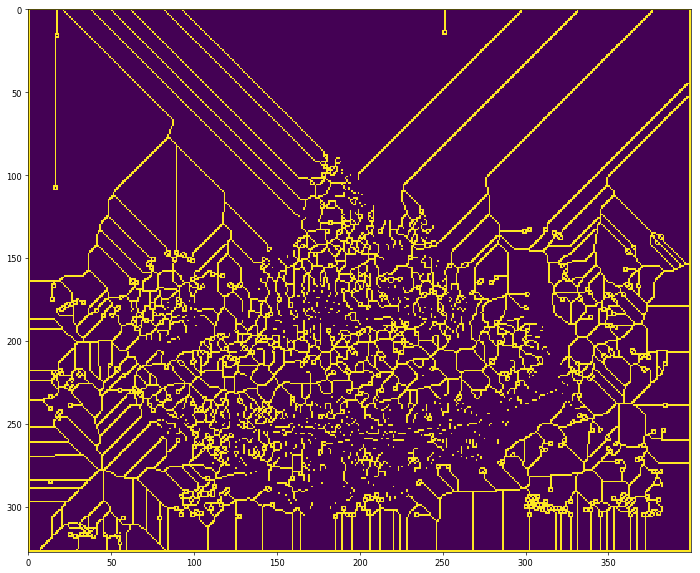

In [5]:
import numpy as np
from PIL import Image
from matplotlib import cm
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure
from requests import get
%matplotlib inline

def read_image(path, size=400):
    if path.startswith('https://'):
        image = Image.open(get(path, stream=True).raw)
    else:
        image = Image.open(path)
    width, height = image.size
    width, height = size, int(size * height / width)
    image = image.resize((width, height), Image.ANTIALIAS)  
    data = image.getdata()
    assert data.bands in [3, 4], 'RGB or RGBA image is required'
    raw = np.array(data, dtype=np.uint8)
    return raw.reshape(height, width, data.bands)

def plot(image, palette):
    y, x = image.shape
    plot = figure(x_range=(0, x), y_range=(0, y), 
                  plot_width=x, plot_height=y)
    plot.axis.visible = False
    plot.toolbar_location = None
    plot.min_border = 0
    plot.image([np.flipud(image)], x=0, y=0, dw=x, dh=y,
               palette=palette)
    return plot

def grayscale(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    # weighted channel sum
    image = image[:, :, 0] * .21 + \
            image[:, :, 1] * .72 + \
            image[:, :, 2] * .07
    resimg = np.zeros_like(image)
    resimg[image > .5] = 1.
    #return image.reshape(height, width)
    return resimg.reshape(height, width)

def keepcols(image):
    height, width, _ = image.shape
    image = np.array(image, dtype=np.float32) / 255
    image = image[:, :, 0] + \
            image[:, :, 1] + \
            image[:, :, 2]
    return image.reshape(height, width)

def neighbours(x, y, image):
    '''Return 8-neighbours of point p1 of picture, in order'''
    i = image
    x1, y1, x_1, y_1 = x+1, y-1, x-1, y+1
    return [i[y1][x],  i[y1][x1],   i[y][x1],  i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9
 
def transitions(neighbours):
    '''the number of transitions from white to black, (0 -> 1)'''
    n = neighbours + neighbours[0:1]    # P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))
 
def zhangSuen(image):
    '''zhang Suen thinning: used to thin a black and white i.e. one bit per pixel images'''
    changing1 = changing2 = [(-1, -1)]
    while changing1 or changing2:
        # Step 1: detect and adjust borders
        changing1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image) # on all black pixels P1 that can have 8 neighbours
                if (image[y][x] == 1 and    # (Condition 0) The pixel is black and has eight neighbours
                    P4 * P6 * P8 == 0 and   # Condition 4 At least one of P4 and P6 and P8 is white
                    P2 * P4 * P6 == 0 and   # Condition 3 At least one of P2 and P4 and P6 is white
                    transitions(n) == 1 and # Condition 2 number of transitions A(P1) = 1
                    2 <= sum(n) <= 6):      # Condition 1 sum(n) = number of black pixel neighbours of P1
                    changing1.append((x,y))
        for x, y in changing1: image[y][x] = 0
        # Step 2: remove border pixels with neighborhood in A1
        changing2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and    # (Condition 0)
                    P2 * P6 * P8 == 0 and   # Condition 4
                    P2 * P4 * P8 == 0 and   # Condition 3
                    transitions(n) == 1 and # Condition 2
                    2 <= sum(n) <= 6):      # Condition 1
                    changing2.append((x,y))
        for x, y in changing2: image[y][x] = 0
    return image
 
if __name__ == '__main__':
    image_rgb = read_image('fly.jpg')
    image_gray = grayscale(image_rgb)
    after = zhangSuen(image_gray)
    figure(num=None, figsize=(16, 12), dpi=60, facecolor='white', edgecolor='k')
    imshow(after) # show inline

In [12]:
# LSTM demo
import numpy as np

def sigmoid(x):
    '''stable sigmoid function'''
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

if __name__ == '__main__':
    xt = np.array([1, 2, 3])
    ht1 = np.array([1, 2])
    ct1 = np.array([1, 2, 3, 4, 5]) # dim ht1 + dim xt (concat)

    Wf = np.random.rand(5, 5)
    Wi = np.random.rand(5, 5)
    Wc = np.random.rand(5, 5)
    Wo = np.random.rand(5, 5)

    ht1xt = np.concatenate((ht1, xt), axis=0) # concatenate previous hidden state and input data

    for i in range(1000):
        # biases omitted
        ft = sigmoid(Wf.dot(ht1xt)) # what of ct-1 is forgotten
        it = sigmoid(Wi.dot(ht1xt)) # what is new
        ctt = np.tanh(Wc.dot(ht1xt)) # what does the cell consider to keep
        ct = ft * ct1 + it * ctt # combine forget and new
        ot = sigmoid(Wo.dot(ht1xt)) # how much to output
        ht = ot * np.tanh(ct) # new hidden state
        ht1 = ht
        ct1 = ct
    
    print(ft, it, ctt, ct, ot, ht)

[0.95630907 0.95863136 0.99401683 0.98136719 0.98102083] [0.99221459 0.98522747 0.88768529 0.99890066 0.78886917] [0.9999314  0.9999946  0.9999956  0.99942394 0.9998429 ] [ 22.70829377  23.81567694 148.00307683  53.57887463  41.55846313] [0.99553581 0.98029334 0.99899565 0.9993133  0.98692654] [0.99553581 0.98029334 0.99899565 0.9993133  0.98692654]


In [ ]:

import numpy as np

H = 128 # Number of LSTM layer's neurons D = ... # Number of input dimension == number of items in vocabulary Z = H + D # Because we will concatenate LSTM state with the input 
model = dict(
    Wf=np.random.randn(Z, H) / np.sqrt(Z / 2.),
    Wi=np.random.randn(Z, H) / np.sqrt(Z / 2.),
    Wc=np.random.randn(Z, H) / np.sqrt(Z / 2.),
    Wo=np.random.randn(Z, H) / np.sqrt(Z / 2.),
    Wy=np.random.randn(H, D) / np.sqrt(D / 2.),
    bf=np.zeros((1, H)),
    bi=np.zeros((1, H)),
    bc=np.zeros((1, H)),
    bo=np.zeros((1, H)),
    by=np.zeros((1, D))
)

def lstm_forward(X, state):
    m = model
    Wf, Wi, Wc, Wo, Wy = m['Wf'], m['Wi'], m['Wc'], m['Wo'], m['Wy']
    bf, bi, bc, bo, by = m['bf'], m['bi'], m['bc'], m['bo'], m['by']
    h_old, c_old = state
    # One-hot encode     X_one_hot = np.zeros(D)
    X_one_hot[X] = 1.
    X_one_hot = X_one_hot.reshape(1, -1)
    # Concatenate old state with current input     X = np.column_stack((h_old, X_one_hot))
    hf = sigmoid(X @ Wf + bf)
    hi = sigmoid(X @ Wi + bi)
    ho = sigmoid(X @ Wo + bo)
    hc = tanh(X @ Wc + bc)
    c = hf * c_old + hi * hc
    h = ho * tanh(c)
    y = h @ Wy + by
    prob = softmax(y)
    state = (h, c) # Cache the states of current h & c for next iter     cache = ... # Add all intermediate variables to this cache 
    return prob, state, cache

def lstm_backward(prob, y_train, d_next, cache):
    # Unpack the cache variable to get the intermediate variables used in forward step     ... = cache
    dh_next, dc_next = d_next
    # Softmax loss gradient     dy = prob.copy()
    dy[1, y_train] -= 1.
    # Hidden to output gradient     dWy = h.T @ dy
    dby = dy
    # Note we're adding dh_next here     dh = dy @ Wy.T + dh_next
    # Gradient for ho in h = ho * tanh(c)     dho = tanh(c) * dh
    dho = dsigmoid(ho) * dho
    # Gradient for c in h = ho * tanh(c), note we're adding dc_next here     dc = ho * dh * dtanh(c)
    dc = dc + dc_next
    # Gradient for hf in c = hf * c_old + hi * hc     dhf = c_old * dc
    dhf = dsigmoid(hf) * dhf
    # Gradient for hi in c = hf * c_old + hi * hc     dhi = hc * dc
    dhi = dsigmoid(hi) * dhi
    # Gradient for hc in c = hf * c_old + hi * hc     dhc = hi * dc
    dhc = dtanh(hc) * dhc
    # Gate gradients, just a normal fully connected layer gradient     dWf = X.T @ dhf
    dbf = dhf
    dXf = dhf @ Wf.T
    dWi = X.T @ dhi
    dbi = dhi
    dXi = dhi @ Wi.T
    dWo = X.T @ dho
    dbo = dho
    dXo = dho @ Wo.T
    dWc = X.T @ dhc
    dbc = dhc
    dXc = dhc @ Wc.T

    # As X was used in multiple gates, the gradient must be accumulated here     dX = dXo + dXc + dXi + dXf
    # Split the concatenated X, so that we get our gradient of h_old     dh_next = dX[:, :H]
    # Gradient for c_old in c = hf * c_old + hi * hc     dc_next = hf * dc
    grad = dict(Wf=dWf, Wi=dWi, Wc=dWc, Wo=dWo, Wy=dWy, bf=dbf, bi=dbi, bc=dbc, bo=dbo, by=dby)
    state = (dh_next, dc_next)
    return grad, state

def train_step(X_train, y_train, state):
    probs = []
    caches = []
    loss = 0.
    h, c = state
    # Forward Step 
    for x, y_true in zip(X_train, y_train):
        prob, state, cache = lstm_forward(x, state, train=True)
        loss += cross_entropy(prob, y_true)
        # Store forward step result to be used in backward step         probs.append(prob)
        caches.append(cache)
    # The loss is the average cross entropy     loss /= X_train.shape[0]
    # Backward Step 
    # Gradient for dh_next and dc_next is zero for the last timestep     d_next = (np.zeros_like(h), np.zeros_like(c))
    grads = {k: np.zeros_like(v) for k, v in model.items()}
    # Go backward from the last timestep to the first     for prob, y_true, cache in reversed(list(zip(probs, y_train, caches))):
        grad, d_next = lstm_backward(prob, y_true, d_next, cache)
        # Accumulate gradients from all timesteps         for k in grads.keys():
            grads[k] += grad[k]
    return grads, loss, state



In [4]:
# embedding test
import numpy as np
import matplotlib.pyplot as plt

def token_dct(tokens):
    '''build a token dictionary from list tokens'''
    tdct = {}
    tidx = 0
    for token in tokens:
        if not token in tdct:
            tdct[token] = tidx
            tidx += 1
    return tdct

def tokenize(text, tdct):
    '''tokenize list text via mappings from token dict tdct'''
    ttxt = []
    for word in text:
        try:
            ttxt.append(tdct[word])
        except KeyError:
            ttxt.append(word) # leave unmapped
    return ttxt

if __name__ == '__main__':
    
    tsttxt = 'the brown fox jumps over the lazy dog which lies in front of the door'
    tsttlst = tsttxt.split()
    tdct = token_dct(tsttlst)
    ttxt = np.array(tokenize(tsttlst, tdct))
    
    # todo: scale to +- 1
    
    x = np.array(ttxt) # auto-encode
    y = np.array(ttxt) # auto-encode
    
    D_in = len(ttxt)
    H = 2 # embedding dimension
    D_out = D_in

    # Randomly initialize weights
    w1 = np.random.randn(D_in, H)*0.01
    w2 = np.random.randn(H, D_out)*0.01
    
    b1 = np.zeros(H) # bias
    b2 = np.zeros(D_out)
    
    #mw1 = np.zeros_like(w1)
    #mw2 = np.zeros_like(w2)
    
    grad_w1 = np.zeros_like(w1)
    grad_w2 = np.zeros_like(w2)

    learning_rate = 1e-1
    for t in range(50):
        # Forward pass: compute predicted y
        h = np.dot(x, w1) + b1
        h_relu = np.maximum(h, 0)
        y_pred = np.dot(h_relu, w2) + b2

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        if t % 10 == 0:
            print(t, loss)

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = (y_pred - y)
        grad_w2 = np.dot(h_relu, np.eye(H, D_out)) * grad_y_pred # dw2 = (.) ReLu(h)
        grad_b2 = grad_y_pred
        grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0 # ReLU'
        grad_w1 = np.dot(x.T, np.dot(np.eye(D_in, H), grad_h))
        grad_b1 = np.dot(w2, grad_y_pred)

        # Update weights
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2
        b1 -= learning_rate * grad_b1
        b2 -= learning_rate * grad_b2
        #for param, dparam, mem in zip([w1, w2], [grad_w1, grad_w2], [mw1, mw2]):
            #mem += dparam * dparam
            #param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

    print(h)

0 649.941345337779
10 79.24981234490899
20 9.634927061824431
30 1.171382199400758
40 0.1424127290500877
[-1.93018392 -1.82280684]


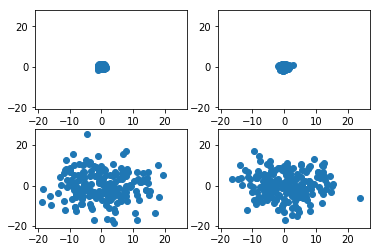

In [3]:
# Demings funnel
import numpy as np
import matplotlib.pyplot as plt

#plt.yticks(np.arange(min, max, step))


# Rule 1: The funnel remains directly above the target.
mu, sigma = 0, 0.5 # mean and standard deviation
N = 200
#x = np.random.rand(N)
x = np.random.normal(mu, sigma, N)
#y = np.random.rand(N)
y = np.random.normal(mu, sigma, N)
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax1 = plt.subplot(2, 2, 1)
plt.scatter(x, y)

# Rule 2: Adjust the funnel position by shifting the target to compensate after each drop.
# E.g. If the last drop missed 1 cm east, move the funnel 1 cm to the west of its current position.
mux, muy = 0, 0
for i in range(N):
    x = np.random.normal(mux, sigma, N)
    y = np.random.normal(muy, sigma, N)
    mux -= x
    muy -= y
plt.subplot(2, 2, 2, sharex=ax1, sharey=ax1)
plt.scatter(x, y)

# Rule 3: As rule 2, but first move the funnel back over the target, before making the adjustment.
# E.g. If the funnel is 2 cm north, and the marble lands 3 cm north, move the funnel 3 cm south of the target.
mux, muy = 0, 0
for i in range(N):
    x = np.random.normal(mux, sigma, N)
    y = np.random.normal(muy, sigma, N)
    mux = -x
    muy = -y
plt.subplot(2, 2, 3, sharex=ax1, sharey=ax1)
plt.scatter(x, y)

# Rule 4: The funnel is moved directly over the last place a marble landed.
mux, muy = 0, 0
for i in range(N):
    x = np.random.normal(mux, sigma, N)
    y = np.random.normal(muy, sigma, N)
    mux = x
    muy = y
plt.subplot(2, 2, 4, sharex=ax1, sharey=ax1)
plt.scatter(x, y)

plt.show()

In [37]:
# attention test
import numpy as np

def softmax(e):
    '''softmax'''
    return np.exp(e) / np.sum(np.exp(e))

def algnmt(h, w):
    '''alignment function'''
    return np.tanh(np.dot(w, h))

W = np.random.rand(1, 4) # dense layer weights - the only trainable portion of the attention layer
W = np.ones_like(W)
#hj = np.random.rand(4, 3)
hj = np.array([[-1, -2, 3],
               [-1, -2, -3],
               [-1, 2, 3],
               [-1, 9, 3]])

print(np.dot(W, hj))

ej = algnmt(hj, W) # scalar alignment score for each h via dense layer (tanh), between -1 and 1, weights trained
alpha = softmax(ej) # alpha vector from the softmax ej (between 0 and 1)

print(ej)
print(alpha)

c = np.sum(np.dot(alpha, hj.T)) # weigh h with alphas
print(c)

[[-4.  7.  6.]]
[[-0.9993293   0.99999834  0.99998771]]
[[0.06341918 0.4682929  0.46828792]]
5.834101113919731


In [43]:
# left factorials

def fact(n):
    '''simple factorial, non-recursive'''
    if n <= 0:
        return 1
    res = 1
    for k in range(2, n+1):
        res *= k
    return res

def lfact(n):
    '''left factorial = sum from k=0 to n-1 over k!'''
    if n <= 0:
        return 0
    res = 0
    for k in range(n):
        res += fact(k)
    return res

if __name__ == '__main__':
    print(lfact(5))

34
